# Solving ODEs in Julia

<p class="pm-node nj-authors">Chris Rackauckas</p>

Source: <https://github.com/JuliaDiffEq/DiffEqTutorials.jl>

# Ordinary Differential Equations (ODEs)

This notebook will get you started with DifferentialEquations.jl by introducing you to the functionality for solving ordinary differential equations (ODEs). The corresponding documentation page is the [ODE tutorial](http://docs.juliadiffeq.org/latest/tutorials/ode_example.html). While some of the syntax may be different for other types of equations, the same general principles hold in each case. Our goal is to give a gentle and thorough introduction that highlights these principles in a way that will help you generalize what you have learned.

## Background

If you are new to the study of differential equations, it can be helpful to do a quick background read on [the definition of ordinary differential equations](https://en.wikipedia.org/wiki/Ordinary_differential_equation). We define an ordinary differential equation as an equation which describes the way that a variable $u$ changes, that is

$u' = f(u,p,t)$

where $p$ are the parameters of the model, $t$ is the time variable, and $f$ is the nonlinear model of how $u$ changes. The initial value problem also includes the information about the starting value:

$u(t_0) = u_0$

Together, if you know the starting value and you know how the value will change with time, then you know what the value will be at any time point in the future. This is the intuitive definition of a differential equation.

## First Model: Exponential Growth

Our first model will be the canonical exponential growth model. This model says that the rate of change is proportional to the current value, and is this:

$u' = au$

where we have a starting value $u(0)=u_0$. Let's say we put 1 dollar into Bitcoin which is increasing at a rate of $98%$ per year. Then calling now $t=0$ and measuring time in years, our model is:

$u' = 0.98u$

and $u(0) = 1.0$. We encode this into Julia by noticing that, in this setup, we match the general form when

In [1]:
f(u,p,t) = 0.98u

f (generic function with 1 method)

with $u_0 = 1.0$. If we want to solve this model on a time span from `t=0.0` to `t=1.0`, then we define an `ODEProblem` by specifying this function `f`, this initial condition `u0`, and this time span as follows:

In [2]:
using DifferentialEquations
f(u,p,t) = 0.98u
u0 = 1.0
tspan = (0.0,1.0)
prob = ODEProblem(f,u0,tspan)

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 1.0)
u0: 1.0

To solve our `ODEProblem` we use the command `solve`.

In [2]:
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 5-element Vector{Float64}:
 0.0
 0.10042494449239292
 0.35218603951893646
 0.6934436334555072
 1.0
u: 5-element Vector{Float64}:
 1.0
 1.1034222047865465
 1.4121908848175448
 1.9730384867968267
 2.664456142481423

and that's it: we have succesfully solved our first ODE!

## Analyzing the Solution

Of course, the solution type is not interesting in and of itself. We want to understand the solution! The documentation page which explains in detail the functions for analyzing the `solution` is the [Solution Handling](http://docs.juliadiffeq.org/latest/basics/solution.html) page. Here we will describe some of the basics. You can plot the solution using the plot recipe provided by [Plots.jl](http://docs.juliaplots.org/latest/):

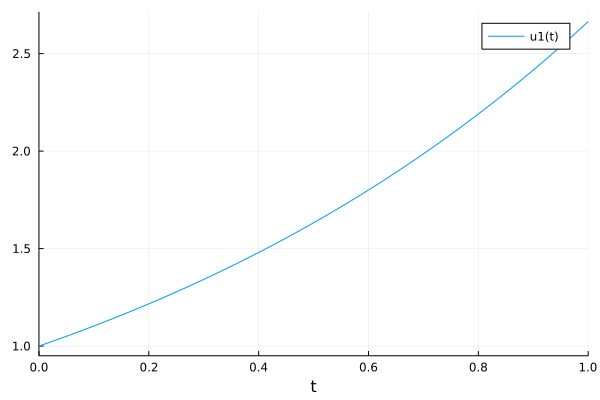

In [3]:
using Plots; gr()
plot(sol)

From the picture we see that the solution is an exponential curve, which matches our intuition. As a plot recipe, we can annotate the result using any of the [Plots.jl attributes](http://docs.juliaplots.org/latest/attributes/). For example:

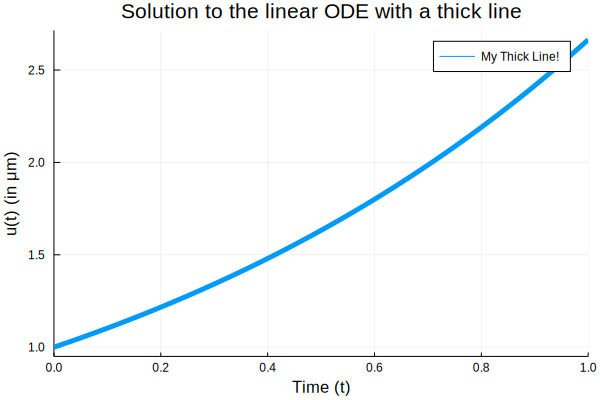

In [1]:
plot(sol, linewidth=5,
     title="Solution to the linear ODE with a thick line",
     xaxis="Time (t)", yaxis="u(t) (in μm)",
     label="My Thick Line!") # legend=false

Using the mutating `plot!` command we can add other pieces to our plot. For this ODE we know that the true solution is $u(t) = u_0 exp(at)$, so let's add some of the true solution to our plot:

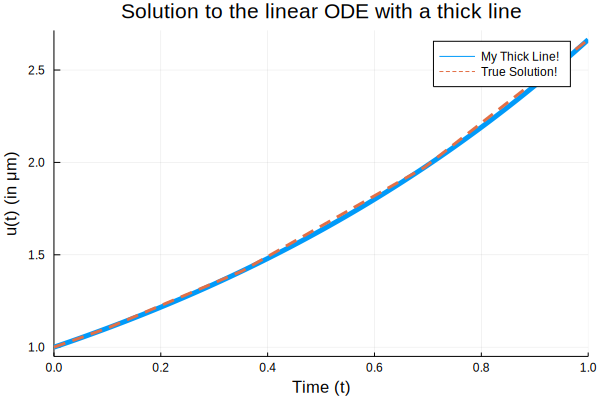

In [1]:
plot!(sol.t, t->1.0*exp(0.98t), lw=3, ls=:dash, label="True Solution!")

In the previous command I demonstrated `sol.t`, which grabs the array of time points that the solution was saved at:

In [1]:
sol.t

5-element Vector{Float64}:
 0.0
 0.100425
 0.352186
 0.693444
 1.0

We can get the array of solution values using `sol.u`:

In [1]:
sol.u

5-element Vector{Float64}:
 1.0
 1.10342
 1.41219
 1.97304
 2.66446

`sol.u[i]` is the value of the solution at time `sol.t[i]`. We can compute arrays of functions of the solution values using standard comprehensions, like:

In [1]:
[t+u for (u,t) in tuples(sol)]

5-element Vector{Float64}:
 1.0
 1.20385
 1.76438
 2.66648
 3.66446

However, one interesting feature is that, by default, the solution is a continuous function. If we check the print out again:

In [1]:
sol

retcode: Success
Interpolation: automatic order switching interpolation
t: 5-element Vector{Float64}:
 0.0
 0.100425
 0.352186
 0.693444
 1.0
u: 5-element Vector{Float64}:
 1.0
 1.10342
 1.41219
 1.97304
 2.66446

you see that it says that the solution has a order changing interpolation. The default algorithm automatically switches between methods in order to handle all types of problems. For non-stiff equations (like the one we are solving), it is a continuous function of 4th order accuracy. We can call the solution as a function of time `sol(t)`. For example, to get the value at `t=0.45`, we can use the command:

In [1]:
sol(0.45)

1.55426

## Second model: logistic growth 

In [57]:
function l(x,p,t)
    return (x/p[1])*(1 - x/p[2])
end

x0 = 1
p = (1.0,10.0)
tspan = (0.0,10.0)
prob = ODEProblem(l,x0,tspan,p)
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 14-element Vector{Float64}:
  0.0
  0.1021499865082988
  0.3787106067637411
  0.7670702070854434
  1.2490323282559588
  1.871264194611539
  2.7640603324115545
  3.5773063567708
  4.660501783230545
  5.6514122308874
  6.775812644245119
  8.017614138663742
  9.491071749757321
 10.0
u: 14-element Vector{Float64}:
 1.0
 1.0957646740871922
 1.3961228111999402
 1.93074642758355
 2.792485674176074
 4.192240031836991
 6.3803550768609005
 7.990065341342555
 9.215220852570736
 9.69347687970919
 9.898209308526647
 9.970291371254804
 9.993088490101666
 9.995844056293008

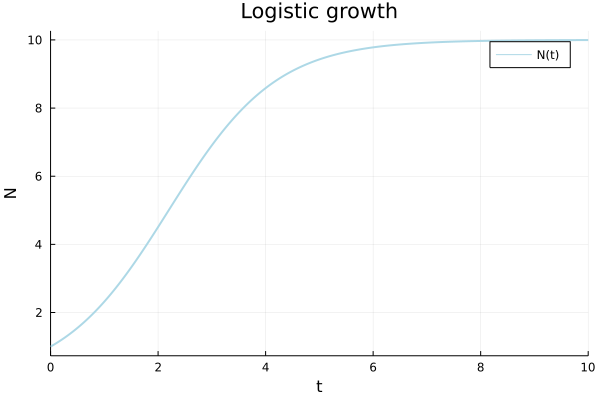

In [71]:
plot(sol, color = "lightblue", linewidth = 2, label = "N(t)", yaxis = "N", title = "Logistic growth")

## Controlling the Solver

DifferentialEquations.jl has a common set of solver controls among its algorithms which can be found [at the Common Solver Options](http://docs.juliadiffeq.org/latest/basics/common_solver_opts.html) page. We will detail some of the most widely used options.

### Tolerances

The most useful options are the tolerances `abstol` and `reltol`. These tell the internal adaptive time stepping engine how precise of a solution you want. Generally, `reltol` is the relative accuracy while `abstol` is the accuracy when `u` is near zero. These tolerances are local tolerances and thus are not global guarantees. However, a good rule of thumb is that the total solution accuracy is 1-2 digits less than the relative tolerances. Thus for the defaults `abstol=1e-6` and `reltol=1e-3`, you can expect a global accuracy of about 1-2 digits. If we want to get around 6 digits of accuracy, we can use the commands:

In [1]:
sol = solve(prob,abstol=1e-8,reltol=1e-8)

retcode: Success
Interpolation: automatic order switching interpolation
t: 9-element Vector{Float64}:
 0.0
 0.0412749
 0.146799
 0.286315
 0.438194
 0.611892
 0.798566
 0.999352
 1.0
u: 9-element Vector{Float64}:
 1.0
 1.04128
 1.15473
 1.32391
 1.53638
 1.82149
 2.18714
 2.66276
 2.66446

Now we can see no visible difference against the true solution:

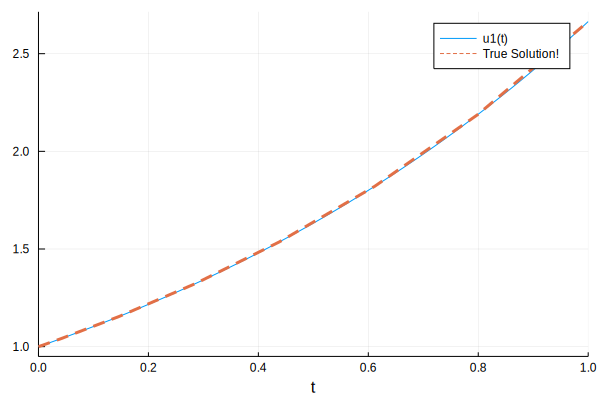

In [1]:
plot(sol)
plot!(sol.t, t->1.0*exp(0.98t),lw=3,ls=:dash,label="True Solution!")

Notice that by decreasing the tolerance, the number of steps the solver had to take was `9` instead of the previous `5`. There is a trade off between accuracy and speed, and it is up to you to determine what is the right balance for your problem.

### Saveat

Another common option is to use `saveat` to make the solver save at specific time points. For example, if we want the solution at an even grid of 0.1 time unit, we would use the command:

In [1]:
sol = solve(prob, saveat=0.1)

retcode: Success
Interpolation: 1st order linear
t: 11-element Vector{Float64}:
 0.0
 0.1
 0.2
 0.3
 0.4
 0.5
 0.6
 0.7
 0.8
 0.9
 1.0
u: 11-element Vector{Float64}:
 1.0
 1.10296
 1.21653
 1.34178
 1.47994
 1.63232
 1.80038
 1.98576
 2.19022
 2.41573
 2.66446

Notice that when `saveat` is used the continuous output variables are no longer saved and thus `sol(t)`, the interpolation, is only first order. We can save at an uneven grid of points by passing a collection of values to `saveat`. For example:

In [1]:
sol = solve(prob,saveat=[0.2,0.7,0.9])

retcode: Success
Interpolation: 1st order linear
t: 3-element Vector{Float64}:
 0.2
 0.7
 0.9
u: 3-element Vector{Float64}:
 1.21653
 1.98576
 2.41573

If we need to reduce the amount of saving, we can also turn off the continuous output directly via `dense=false`:

In [1]:
sol = solve(prob,dense=false)

retcode: Success
Interpolation: 1st order linear
t: 5-element Vector{Float64}:
 0.0
 0.100425
 0.352186
 0.693444
 1.0
u: 5-element Vector{Float64}:
 1.0
 1.10342
 1.41219
 1.97304
 2.66446

and to turn off all intermediate saving we can use `save_everystep=false`:

In [1]:
sol = solve(prob,save_everystep=false)

retcode: Success
Interpolation: 1st order linear
t: 2-element Vector{Float64}:
 0.0
 1.0
u: 2-element Vector{Float64}:
 1.0
 2.66446

If we want to solve and only save the final value, we can even set `save_start=false`.

In [1]:
sol = solve(prob,save_everystep=false,save_start = false)

retcode: Success
Interpolation: 1st order linear
t: 1-element Vector{Float64}:
 1.0
u: 1-element Vector{Float64}:
 2.66446

Note that similarly on the other side there is `save_end=false`.

More advanced saving behaviors, such as saving functionals of the solution, are handled via the `SavingCallback` in the [Callback Library](http://docs.juliadiffeq.org/latest/features/callback_library.html#SavingCallback-1) which will be addressed later in the tutorial.

### Choosing Solver Algorithms

There is no best algorithm for numerically solving a differential equation. When you call `solve(prob)`, DifferentialEquations.jl makes a guess at a good algorithm for your problem, given the properties that you ask for (the tolerances, the saving information, etc.). However, in many cases you may want more direct control. A later notebook will help introduce the various *algorithms* in DifferentialEquations.jl, but for now let's introduce the *syntax*.

The most crucial determining factor in choosing a numerical method is the stiffness of the model. Stiffness is roughly characterized by a Jacobian `f` with large eigenvalues. That's quite mathematical, and we can think of it more intuitively: if you have big numbers in `f` (like parameters of order `1e5`), then it's probably stiff. Or, as the creator of the MATLAB ODE Suite, Lawrence Shampine, likes to define it, if the standard algorithms are slow, then it's stiff. We will go into more depth about diagnosing stiffness in a later tutorial, but for now note that if you believe your model may be stiff, you can hint this to the algorithm chooser via `alg_hints = [:stiff]`.

In [1]:
sol = solve(prob,alg_hints=[:stiff])

retcode: Success
Interpolation: specialized 3rd order "free" stiffness-aware interpolation
t: 8-element Vector{Float64}:
 0.0
 0.056533
 0.172707
 0.31646
 0.50575
 0.729224
 0.991298
 1.0
u: 8-element Vector{Float64}:
 1.0
 1.05697
 1.18442
 1.3636
 1.64154
 2.04345
 2.64183
 2.66445

Stiff algorithms have to solve implicit equations and linear systems at each step so they should only be used when required.

If we want to choose an algorithm directly, you can pass the algorithm type after the problem as `solve(prob,alg)`. For example, let's solve this problem using the `Tsit5()` algorithm, and just for show let's change the relative tolerance to `1e-6` at the same time:

In [1]:
sol = solve(prob,Tsit5(),reltol=1e-6)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 10-element Vector{Float64}:
 0.0
 0.0289708
 0.100491
 0.194589
 0.307173
 0.439454
 0.588343
 0.752487
 0.929302
 1.0
u: 10-element Vector{Float64}:
 1.0
 1.0288
 1.10349
 1.21009
 1.35125
 1.53828
 1.77993
 2.09057
 2.4861
 2.66446

## Systems of ODEs: The Lorenz Equation

Now let's move to a system of ODEs. The [Lorenz equation](https://en.wikipedia.org/wiki/Lorenz_system) is the famous "butterfly attractor" that spawned chaos theory. It is defined by the system of ODEs:

$ \begin{align} \frac{dx}{dt} &= \sigma (y - x) \\ \frac{dy}{dt} &= x (\rho - z) -y \\ \frac{dz}{dt} &= xy - \beta z \end{align} $

To define a system of differential equations in DifferentialEquations.jl, we define our `f` as a vector function with a vector initial condition. Thus, for the vector `u = [x,y,z]'`, we have the derivative function:

In [3]:
function lorenz!(du,u,p,t)
    σ,ρ,β = p
    du[1] = σ*(u[2]-u[1])
    du[2] = u[1]*(ρ-u[3]) - u[2]
    du[3] = u[1]*u[2] - β*u[3]
end

lorenz! (generic function with 1 method)

Notice here we used the in-place format which writes the output to the preallocated vector `du`. For systems of equations the in-place format is faster. We use the initial condition $u_0 = [1.0,0.0,0.0]$ as follows:

In [4]:
u0 = [1.0,0.0,0.0]

3-element Vector{Float64}:
 1.0
 0.0
 0.0

Lastly, for this model we made use of the parameters `p`. We need to set this value in the `ODEProblem` as well. For our model we want to solve using the parameters $\sigma = 10$, $\rho = 28$, and $\beta = 8/3$, and thus we build the parameter collection:

In [5]:
p = (10,28,8/3) # we could also make this an array, or any other sequence type!

(10, 28, 2.6666666666666665)

Now we generate the `ODEProblem` type. In this case, since we have parameters, we add the parameter values to the end of the constructor call. Let's solve this on a time span of `t=0` to `t=100`:

In [6]:
tspan = (0.0,100.0)
prob = ODEProblem(lorenz!,u0,tspan,p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: 3-element Vector{Float64}:
 1.0
 0.0
 0.0

Now, just as before, we solve the problem:

In [7]:
@time sol = solve(prob)

  4.534657 seconds (8.84 M allocations: 488.545 MiB, 3.57% gc time, 99.88% compilation time)


retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 1289-element Vector{Float64}:
   0.0
   3.5678604836301404e-5
   0.0003924646531993154
   0.0032624087100077666
   0.009058076582749423
   0.016956470605311864
   0.027689959227781235
   0.04185635103821218
   0.060240410627700816
   0.0836854113984534
   0.11336499269451543
   0.14862181409827
   0.18703978025370946
   ⋮
  99.3397852599881
  99.40421692882006
  99.4725041528708
  99.5412045549744
  99.6085310903818
  99.67192934036703
  99.72954041869967
  99.78291962638104
  99.84176034083528
  99.90666445162192
  99.98069072555015
 100.0
u: 1289-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.9996434557625105, 0.0009988049817849058, 1.781434788799189e-8]
 [0.9961045497425811, 0.010965399721242457, 2.1469553658389193e-6]
 [0.9693591550149778, 0.08977063252764937, 0.0001438019170127846]
 [0.924204355043198, 0.242289149116772, 0.001046162539761

The same solution handling features apply to this case. Thus `sol.t` stores the time points and `sol.u` is an array storing the solution at the corresponding time points.

However, there are a few extra features which are good to know when dealing with systems of equations. First of all, `sol` also acts like an array. `sol[i]` returns the solution at the `i`th time point.

In [1]:
println(sol.t[10], ",", sol[10])

Additionally, the solution acts like a matrix where `sol[j,i]` is the value of the `j`th variable at time `i`:

In [1]:
sol[2,10]

2.05233

We can get a real matrix by performing a conversion:

In [1]:
A = Array(sol)

3×1300 Matrix{Float64}:
 1.0  0.999643     0.996105    0.969359     …   6.41194   4.73428   4.59626
 0.0  0.000998805  0.0109654   0.0897706        3.40871   3.91368   4.81905
 0.0  1.78143e-8   2.14696e-6  0.000143802     28.483    24.0022   22.0232

This is the same as sol, i.e. `sol[i,j] = A[i,j]`, but now it's a true matrix. Plotting will by default show the time series for each variable:

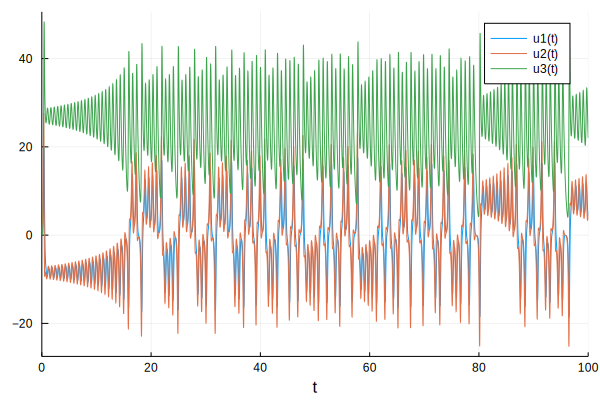

In [1]:
plot(sol)

If we instead want to plot values against each other, we can use the `vars` command. Let's plot variable `1` against variable `2` against variable `3`:

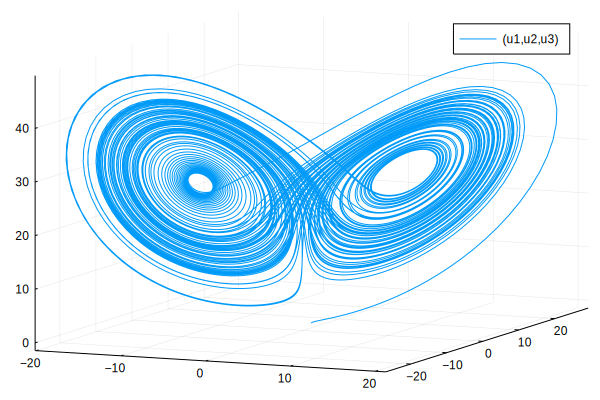

In [1]:
plot(sol,vars=(1,2,3), lw=1)

This is the classic Lorenz attractor plot, where the `x` axis is `u[1]`, the `y` axis is `u[2]`, and the `z` axis is `u[3]`. Note that the plot recipe by default uses the interpolation, but we can turn this off:

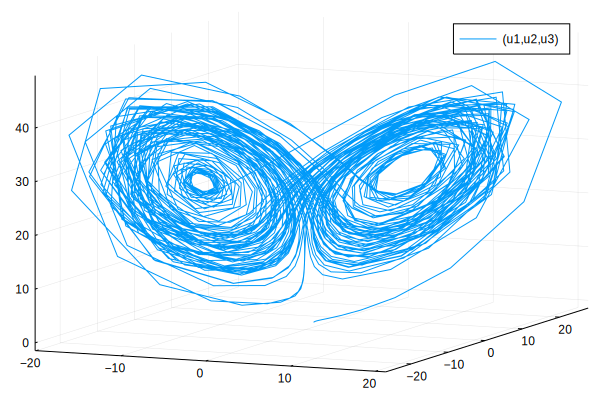

In [1]:
plot(sol,vars=(1,2,3),denseplot=false)

Yikes! This shows how calculating the continuous solution has saved a lot of computational effort by computing only a sparse solution and filling in the values! Note that in vars, `0=time`, and thus we can plot the time series of a single component like:

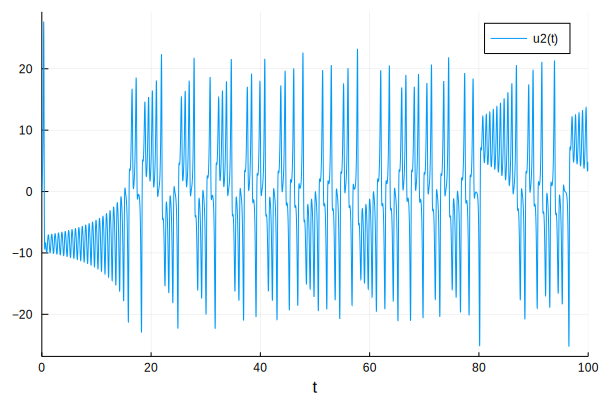

In [1]:
plot(sol,vars=(0,2))

## ModelingToolkit: A DSL for DE systems

Note: [ParameterizedFunctions.jl](https://github.com/JuliaDiffEq/ParameterizedFunctions.jl) is being replaced by **[ModelingToolkit.jl](https://github.com/JuliaDiffEq/ModelingToolkit.jl)**

In many cases you may be defining a lot of functions with parameters. There exists the domain-specific language (DSL) defined by the ModelingToolkit package for helping with this common problem. For example, we can define the Lorenz equation above as follows:

In [1]:
using Catalyst

# Define some variables
# Same as t, σ, ρ, β = [Variable(s)(t; known=true) for s in [:t, :σ, :ρ, :β]]
@parameters t σ ρ β
# Same as x, y, z = [Variable(s)(t) for s in [:x, :y, :z]]
@variables x(t) y(t) z(t)
# Same as D = Differential(t)
@derivatives D'~t

# Define equations (system of ODEs)
eqs = [D(x) ~ σ*(y-x),
       D(y) ~ x*(ρ-z)-y,
       D(z) ~ x*y - β*z]

Each operation builds an `Operation` type, and thus `eqs` is an array of `Operation` and `Variable`s. This holds a tree of the full system that can be analyzed by other programs. We can turn this into an `ODESystem` and a `ODEFunction` via:

In [1]:
de = ODESystem(eqs)
lorenz = ODEFunction(de, [x,y,z], [σ,ρ,β])

ODEFunction{true, var"#f#148"{RuntimeGeneratedFunction{(Symbol("##arg#265"), Symbol("##arg#266"), :t), var"#_RGF_ModTag", var"#_RGF_ModTag", (0xfc14ee4e, 0x407ec7d6, 0x38d8c4c3, 0x7e94e2fd, 0x551c573d)}, RuntimeGeneratedFunction{(Symbol("##out#267"), Symbol("##arg#265"), Symbol("##arg#266"), :t), var"#_RGF_ModTag", var"#_RGF_ModTag", (0x476c7a9e, 0x9f40e55d, 0x75ae1e7a, 0xcf181c7b, 0x9b3ec449)}}, UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Vector{Symbol}, Symbol, var"#120#generated_observed#155"{Bool, ODESystem, Dict{Any, Any}}, Nothing}(f, UniformScaling{Bool}(true), nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, [Symbol("x(t)"), Symbol("y(t)"), Symbol("z(t)")], :t, #120#generated_observed, nothing)

We can then use the result just like an ODE function from before:

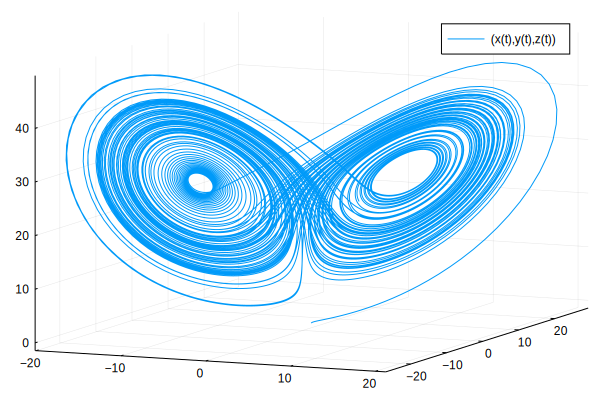

In [1]:
u0 = [1.0,0.0,0.0]
p = (10,28,8/3)
tspan = (0.0,100.0)
prob = ODEProblem(lorenz,u0,tspan,p)
sol = solve(prob)
plot(sol, vars=(1, 2, 3), lw=1)

We can see the generated low-level code via `generate_function` to see how much behind-the-scene work is done by this toolkit.

In [1]:
generate_function(de, [x,y,z], [σ,ρ,β])

(:(function (var"##arg#269", var"##arg#270", t)
      #= /root/.julia/packages/SymbolicUtils/kZD5O/src/code.jl:282 =#
      #= /root/.julia/packages/SymbolicUtils/kZD5O/src/code.jl:283 =#
      let var"x(t)" = #= /root/.julia/packages/SymbolicUtils/kZD5O/src/code.jl:169 =# @inbounds(var"##arg#269"[1]), var"y(t)" = #= /root/.julia/packages/SymbolicUtils/kZD5O/src/code.jl:169 =# @inbounds(var"##arg#269"[2]), var"z(t)" = #= /root/.julia/packages/SymbolicUtils/kZD5O/src/code.jl:169 =# @inbounds(var"##arg#269"[3]), σ = #= /root/.julia/packages/SymbolicUtils/kZD5O/src/code.jl:169 =# @inbounds(var"##arg#270"[1]), ρ = #= /root/.julia/packages/SymbolicUtils/kZD5O/src/code.jl:169 =# @inbounds(var"##arg#270"[2]), β = #= /root/.julia/packages/SymbolicUtils/kZD5O/src/code.jl:169 =# @inbounds(var"##arg#270"[3])
          #= /root/.julia/packages/SymbolicUtils/kZD5O/src/code.jl:375 =#
          (create_array)(typeof(var"##arg#269"), nothing, Val{1}(), Val{(3,)}(), (*)(σ, (+)(var"y(t)", (*)(-1, var"x(

Not only is the DSL convenient syntax, but it does some magic behind the scenes. For example, further parts of the tutorial will describe how solvers for stiff differential equations have to make use of the Jacobian in calculations. Here, the DSL uses symbolic differentiation to automatically derive that function:

In [1]:
generate_jacobian(de)

(:(function (var"##arg#272", var"##arg#273", t)
      #= /root/.julia/packages/SymbolicUtils/kZD5O/src/code.jl:282 =#
      #= /root/.julia/packages/SymbolicUtils/kZD5O/src/code.jl:283 =#
      let var"x(t)" = #= /root/.julia/packages/SymbolicUtils/kZD5O/src/code.jl:169 =# @inbounds(var"##arg#272"[1]), var"y(t)" = #= /root/.julia/packages/SymbolicUtils/kZD5O/src/code.jl:169 =# @inbounds(var"##arg#272"[2]), var"z(t)" = #= /root/.julia/packages/SymbolicUtils/kZD5O/src/code.jl:169 =# @inbounds(var"##arg#272"[3]), σ = #= /root/.julia/packages/SymbolicUtils/kZD5O/src/code.jl:169 =# @inbounds(var"##arg#273"[1]), ρ = #= /root/.julia/packages/SymbolicUtils/kZD5O/src/code.jl:169 =# @inbounds(var"##arg#273"[2]), β = #= /root/.julia/packages/SymbolicUtils/kZD5O/src/code.jl:169 =# @inbounds(var"##arg#273"[3])
          #= /root/.julia/packages/SymbolicUtils/kZD5O/src/code.jl:375 =#
          (create_array)(typeof(var"##arg#272"), nothing, Val{2}(), Val{(3, 3)}(), (*)(-1, σ), (+)(ρ, (*)(-1, var"z(t

The DSL can derive many other functions; this ability is used to speed up the solvers. An extension to DifferentialEquations.jl, **[Latexify.jl](https://github.com/korsbo/Latexify.jl)**, allows you to extract these pieces as LaTeX expressions.

## Internal Types

The last basic user-interface feature to explore is the choice of types. DifferentialEquations.jl respects your input types to determine the internal types that are used. Thus since in the previous cases, when we used `Float64` values for the initial condition, this meant that the internal values would be solved using `Float64`. We made sure that time was specified via `Float64` values, meaning that time steps would utilize 64-bit floats as well. But, by simply changing these types we can change what is used internally.

As a quick example, let's say we want to solve an ODE defined by a matrix. To do this, we can simply use a matrix as input.

In [1]:
A  = [1. 0  0 -5
      4 -2  4 -3
     -4  0  0  1
      5 -2  2  3]
u0 = rand(4,2)
tspan = (0.0,1.0)
f(u,p,t) = A*u
prob = ODEProblem(f,u0,tspan)
sol = solve(prob)

retcode: Success
Interpolation: automatic order switching interpolation
t: 10-element Vector{Float64}:
 0.0
 0.0361408
 0.106153
 0.190682
 0.293947
 0.417379
 0.5599
 0.697824
 0.845152
 1.0
u: 10-element Vector{Matrix{Float64}}:
 [0.527973 0.843716; 0.485811 0.129673; 0.824286 0.969337; 0.167157 0.890166]
 [0.504111 0.682916; 0.609616 0.247925; 0.757896 0.89597; 0.303665 1.19527]
 [0.38489 0.198058; 0.746828 0.270338; 0.661346 0.8707; 0.554876 1.74863]
 [0.11465 -0.683362; 0.746462 -0.0200526; 0.631553 1.11654; 0.819653 2.31257]
 [-0.386818 -2.15111; 0.549445 -0.70503; 0.779565 1.95353; 1.05504 2.7685]
 [-1.17561 -4.30771; 0.160858 -1.65274; 1.29746 3.88735; 1.15643 2.84003]
 [-2.18929 -6.92118; -0.217575 -2.20582; 2.41138 7.45834; 0.951395 2.07429]
 [-3.02693 -8.89965; -0.150174 -1.27565; 3.9587 12.0418; 0.355354 0.284197]
 [-3.39355 -9.40443; 0.811693 2.33909; 5.86469 17.371; -0.749688 -2.85929]
 [-2.69575 -6.81107; 3.18739 9.91773; 7.5842 21.8151; -2.38775 -7.39295]

There is no real difference from what we did before, but now in this case `u0` is a `4x2` matrix. Because of that, the solution at each time point is matrix:

In [1]:
sol[3]

4×2 Matrix{Float64}:
 0.38489   0.198058
 0.746828  0.270338
 0.661346  0.8707
 0.554876  1.74863

In DifferentialEquations.jl, you can use any type that defines `+`, `-`, `*`, `/`, and has an appropriate `norm`. For example, if we want arbitrary precision floating point numbers, we can change the input to be a matrix of `BigFloat`:

In [1]:
big_u0 = big.(u0)

4×2 Matrix{BigFloat}:
 0.527973  0.843716
 0.485811  0.129673
 0.824286  0.969337
 0.167157  0.890166

and we can solve the `ODEProblem` with arbitrary precision numbers by using that initial condition:

In [1]:
prob = ODEProblem(f,big_u0,tspan)
sol = solve(prob)

retcode: Success
Interpolation: automatic order switching interpolation
t: 6-element Vector{Float64}:
 0.0
 0.0665153
 0.280404
 0.564703
 0.874012
 1.0
u: 6-element Vector{Matrix{BigFloat}}:
 [0.527973 0.843716; 0.485811 0.129673; 0.824286 0.969337; 0.167157 0.890166]
 [0.464226 0.500563; 0.685455 0.289996; 0.709814 0.863725; 0.415283 1.44264]
 [-0.311453 -1.93735; 0.58478 -0.602127; 0.746536 1.8056; 1.03099 2.72666]
 [-2.22257 -7.00391; -0.224661 -2.20332; 2.45829 7.60196; 0.937543 2.03017]
 [-3.36359 -9.20643; 1.13993 3.44016; 6.22958 18.353; -1.02122 -3.61847]
 [-2.69575 -6.81106; 3.1874 9.91778; 7.58421 21.8151; -2.38776 -7.39297]

In [1]:
sol[1,3]

-0.311453

To really make use of this, we would want to change `abstol` and `reltol` to be small! Notice that the type for "time" is different than the type for the dependent variables, and this can be used to optimize the algorithm via keeping multiple precisions. We can convert time to be arbitrary precision as well by defining our time span with `BigFloat` variables:

In [1]:
prob = ODEProblem(f,big_u0,big.(tspan))
sol = solve(prob, atol=big(1e-12), rtol=big(1e-12))

retcode: Success
Interpolation: automatic order switching interpolation
t: 6-element Vector{BigFloat}:
 0.0
 0.0665153
 0.280404
 0.564703
 0.874012
 1.0
u: 6-element Vector{Matrix{BigFloat}}:
 [0.527973 0.843716; 0.485811 0.129673; 0.824286 0.969337; 0.167157 0.890166]
 [0.464226 0.500563; 0.685455 0.289996; 0.709814 0.863725; 0.415283 1.44264]
 [-0.311453 -1.93735; 0.58478 -0.602127; 0.746536 1.8056; 1.03099 2.72666]
 [-2.22257 -7.00391; -0.224661 -2.20332; 2.45829 7.60196; 0.937543 2.03017]
 [-3.36359 -9.20643; 1.13993 3.44016; 6.22958 18.353; -1.02122 -3.61847]
 [-2.69575 -6.81106; 3.1874 9.91778; 7.58421 21.8151; -2.38776 -7.39297]

Let's end by showing a more complicated use of types. For small arrays, it's usually faster to do operations on static arrays via the package [StaticArrays.jl](https://github.com/JuliaArrays/StaticArrays.jl). The syntax is similar to that of normal arrays, but for these special arrays we utilize the `@SMatrix` macro to indicate we want to create a static array.

In [1]:
using StaticArrays
A  = @SMatrix [ 1.0  0.0 0.0 -5.0
                4.0 -2.0 4.0 -3.0
               -4.0  0.0 0.0  1.0
                5.0 -2.0 2.0  3.0]
u0 = @SMatrix rand(4,2)
tspan = (0.0,1.0)
f(u,p,t) = A*u
prob = ODEProblem(f,u0,tspan)
sol = solve(prob)

retcode: Success
Interpolation: automatic order switching interpolation
t: 10-element Vector{Float64}:
 0.0
 0.0462115
 0.124802
 0.215006
 0.323359
 0.452083
 0.598864
 0.759438
 0.933497
 1.0
u: 10-element Vector{SMatrix{4, 2, Float64, 8}}:
 [0.98566 0.16182; 0.435871 0.856971; 0.883085 0.570454; 0.430883 0.347484]
 [0.892045 0.0807988; 0.627413 0.853111; 0.735778 0.56512; 0.756325 0.400976]
 [0.548372 -0.0903773; 0.713125 0.800903; 0.583623 0.599841; 1.28059 0.463113]
 [-0.129236 -0.324235; 0.477875 0.69715; 0.638873 0.716825; 1.79905 0.481869]
 [-1.30706 -0.623935; -0.153474 0.567636; 1.15766 0.972029; 2.23254 0.418183]
 [-3.09024 -0.934527; -1.0925 0.511321; 2.57704 1.41922; 2.35741 0.2067]
 [-5.28363 -1.09415; -1.78986 0.73493; 5.3548 2.03033; 1.80335 -0.218981]
 [-7.15832 -0.826519; -1.09405 1.50145; 9.57768 2.59196; 0.148709 -0.879353]
 [-7.32382 0.234041; 2.64782 3.01806; 14.5486 2.62605; -2.9809 -1.71177]
 [-6.54699 0.891289; 5.11656 3.75415; 16.1577 2.35547; -4.51134 -2.0172

In [1]:
sol[3]

4×2 SMatrix{4, 2, Float64, 8} with indices SOneTo(4)×SOneTo(2):
 0.548372  -0.0903773
 0.713125   0.800903
 0.583623   0.599841
 1.28059    0.463113

## Conclusion

These are the basic controls in DifferentialEquations.jl. All equations are defined via a problem type, and the `solve` command is used with an algorithm choice (or the default) to get a solution. Every solution acts the same, like an array `sol[i]` with `sol.t[i]`, and also like a continuous function `sol(t)` with a nice plot command `plot(sol)`. The Common Solver Options can be used to control the solver for any equation type. Lastly, the types used in the numerical solving are determined by the input types, and this can be used to solve with arbitrary precision and add additional optimizations (this can be used to solve via GPUs for example!). While this was shown on ODEs, these techniques generalize to other types of equations as well.

# Choosing an ODE Algorithm

While the default algorithms, along with `alg_hints = [:stiff]`, will suffice in most cases, there are times when you may need to exert more control. The purpose of this part of the tutorial is to introduce you to some of the most widely used algorithm choices and when they should be used. The corresponding page of the documentation is the [ODE Solvers](http://docs.juliadiffeq.org/latest/solvers/ode_solve.html) page which goes into more depth.

## Diagnosing Stiffness

One of the key things to know for algorithm choices is whether your problem is stiff. Let's take for example the driven Van Der Pol equation

In [1]:
using DifferentialEquations, ModelingToolkit

@parameters t μ
@variables x(t) y(t)
@derivatives D'~t

# Define equations (system of ODEs)
eqs = [D(x) ~ 1*y,
       D(y) ~ μ*((1-x^2)*y - x)]
# Convert it to a proper function
de = ODESystem(eqs)
van = ODEFunction(de, [x,y], [μ])
prob = ODEProblem(van,[0.0,2.0],(0.0,6.3),1e6)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 6.3)
u0: 2-element Vector{Float64}:
 0.0
 2.0

One indicating factor that should alert you to the fact that this model may be stiff is the fact that the parameter is `1e6`: large parameters generally mean stiff models. If we try to solve this with the default method:

In [1]:
sol = solve(prob,Tsit5());

Here it shows that maximum iterations were reached. Another thing that can happen is that the solution can return that the solver was unstable (exploded to infinity) or that `dt` became too small. If these happen, the first thing to do is to check that your model is correct. It could very well be that you made an error that causes the model to be unstable!

If the model is the problem, then stiffness could be the reason. We can thus hint to the solver to use an appropriate method:

In [1]:
sol = solve(prob, alg_hints=[:stiff])

retcode: Success
Interpolation: specialized 3rd order "free" stiffness-aware interpolation
t: 825-element Vector{Float64}:
 0.0
 6.68247e-7
 9.12632e-7
 1.37633e-6
 1.73946e-6
 2.18262e-6
 2.62577e-6
 3.0846e-6
 3.54765e-6
 4.01857e-6
 ⋮
 6.10122
 6.10123
 6.1013
 6.10182
 6.10683
 6.13366
 6.18107
 6.23647
 6.3
u: 825-element Vector{Vector{Float64}}:
 [0.0, 2.0]
 [1.90129e-6, 3.90129]
 [2.98131e-6, 4.98131]
 [5.9199e-6, 7.9199]
 [9.38736e-6, 11.3873]
 [1.57368e-5, 17.7368]
 [2.56268e-5, 27.6267]
 [4.17112e-5, 43.7112]
 [6.74524e-5, 69.4523]
 [0.000109223, 111.223]
 ⋮
 [2.00007, -0.666626]
 [2.00006, -0.666632]
 [2.00002, -0.666658]
 [1.99967, -0.666851]
 [1.99632, -0.668716]
 [1.97825, -0.679002]
 [1.9456, -0.698511]
 [1.90622, -0.723788]
 [1.85921, -0.756803]

## The Recommended Methods

When picking a method, the general rules are as follows:

* Higher order is more efficient at lower tolerances, lower order is more efficient at higher tolerances.
* Adaptivity is essential in most real-world scenarios.
* Runge-Kutta methods do well with non-stiff equations, Rosenbrock methods do well with small stiff equations, BDF methods do well with large stiff equations.

While there are always exceptions to the rule, those are good guiding principles. Based on those, a simple way to choose methods is:

* The default is `Tsit5()`, a non-stiff Runge-Kutta method of Order 5
* If you use low tolerances (`1e-8`), try `Vern7()` or `Vern9()`
* If you use high tolerances, try `BS3()`
* If the problem is stiff, try `Rosenbrock23()`, `Rodas5()`, or `CVODE_BDF()`
* If you don't know, use `AutoTsit5(Rosenbrock23())` or `AutoVern9(Rodas5())`.

## Comparison to other Software

If you are familiar with MATLAB, SciPy, or R's DESolve, here's a quick translation start to have transfer your knowledge over.

* `ode23` -> `BS3()`
* `ode45`/`dopri5` -> `DP5()`, though in most cases `Tsit5()` is more efficient
* `ode23s` -> `Rosenbrock23()`, though in most cases `Rodas4()` is more efficient
* `ode113` -> `VCABM()`, though in many cases `Vern7()` is more efficient
* `dop853` -> `DP8()`, though in most cases `Vern7()` is more efficient
* `ode15s`/`vode` -> `QNDF()`, though in many cases `CVODE_BDF()`, `Rodas4()` or `radau()` are more efficient
* `ode23t` -> `Trapezoid()` for efficiency and `GenericTrapezoid()` for robustness
* `ode23tb` -> `TRBDF2`
* `lsoda` -> `lsoda()` (requires `]add LSODA; using LSODA`)
* `ode15i` -> `IDA()`, though in many cases `Rodas4()` can handle the DAE and is significantly more efficient

# Optimizing DiffEq Code

In this section we will walk through some of the main tools for optimizing your code in order to efficiently solve DifferentialEquations.jl. User-side optimizations are important because, for sufficiently difficult problems, most of the time will be spent inside of your `f` function, the function you are trying to solve. "Efficient" integrators are those that reduce the required number of `f` calls to hit the error tolerance. The main ideas for optimizing your DiffEq code, or any Julia function, are the following:

* Make it non-allocating
* Use StaticArrays for small arrays
* Use broadcast fusion
* Make it type-stable
* Reduce redundant calculations
* Make use of BLAS calls
* Optimize algorithm choice

## Optimizing Small Systems (<100 DEs)¶

Let's take the classic Lorenz system from before. Let's start by naively writing the system in its out-of-place form:

In [1]:
function lorenz2(u,p,t)
   dx = 10.0*(u[2]-u[1])
   dy = u[1]*(28.0-u[3]) - u[2]
   dz = u[1]*u[2] - (8/3)*u[3]
   [dx,dy,dz]
end

lorenz2

Here, `lorenz` returns an object, `[dx,dy,dz]`, which is created within the body of `lorenz`.

This is a common code pattern from high-level languages like MATLAB, SciPy, or R's deSolve. However, the issue with this form is that it allocates a vector, `[dx,dy,dz]`, at each step. Let's benchmark the solution process with this choice of function:

In [1]:
using DifferentialEquations, BenchmarkTools
u0 = [1.0;0.0;0.0]
tspan = (0.0,100.0)
prob = ODEProblem(lorenz2,u0,tspan)
@benchmark solve(prob,Tsit5())

BenchmarkTools.Trial: 
  memory estimate:  10.81 MiB
  allocs estimate:  100151
  --------------
  minimum time:     5.057 ms (0.00% GC)
  median time:      5.762 ms (0.00% GC)
  mean time:        9.746 ms (22.27% GC)
  maximum time:     31.010 ms (61.05% GC)
  --------------
  samples:          511
  evals/sample:     1

The BenchmarkTools package's `@benchmark` runs the code multiple times to get an accurate measurement. The minimum time is the time it takes when your OS and other background processes aren't getting in the way. Notice that in this case it takes about 5ms to solve and allocates around 11.11 MiB. However, if we were to use this inside of a real user code we'd see a lot of time spent doing garbage collection (GC) to clean up all of the arrays we made. Even if we turn off saving we have these allocations.

In [1]:
@benchmark solve(prob,Tsit5(),save_everystep=false)

BenchmarkTools.Trial: 
  memory estimate:  9.47 MiB
  allocs estimate:  88644
  --------------
  minimum time:     4.267 ms (0.00% GC)
  median time:      5.083 ms (0.00% GC)
  mean time:        8.864 ms (22.41% GC)
  maximum time:     30.532 ms (71.38% GC)
  --------------
  samples:          562
  evals/sample:     1

The problem of course is that arrays are created every time our derivative function is called. This function is called multiple times per step and is thus the main source of memory usage. To fix this, we can use the in-place form to ***make our code non-allocating***:

In [1]:
function lorenz2!(du,u,p,t)
 du[1] = 10.0*(u[2]-u[1])
 du[2] = u[1]*(28.0-u[3]) - u[2]
 du[3] = u[1]*u[2] - (8/3)*u[3]
end

lorenz2!

Here, instead of creating an array each time, we utilized the cache array `du`. When the inplace form is used, DifferentialEquations.jl takes a different internal route that minimizes the internal allocations as well. When we benchmark this function, we will see quite a difference.

In [1]:
u0 = [1.0;0.0;0.0]
tspan = (0.0,100.0)
prob = ODEProblem(lorenz2!,u0,tspan)
@benchmark solve(prob,Tsit5())

BenchmarkTools.Trial: 
  memory estimate:  1.37 MiB
  allocs estimate:  11751
  --------------
  minimum time:     1.108 ms (0.00% GC)
  median time:      1.183 ms (0.00% GC)
  mean time:        1.646 ms (15.28% GC)
  maximum time:     20.977 ms (89.34% GC)
  --------------
  samples:          3010
  evals/sample:     1

In [1]:
@benchmark solve(prob,Tsit5(),save_everystep=false)

BenchmarkTools.Trial: 
  memory estimate:  6.69 KiB
  allocs estimate:  46
  --------------
  minimum time:     472.429 μs (0.00% GC)
  median time:      517.780 μs (0.00% GC)
  mean time:        538.701 μs (0.00% GC)
  maximum time:     3.713 ms (0.00% GC)
  --------------
  samples:          9163
  evals/sample:     1

Notice there are still some allocations and this is due to the construction of the integration cache. But this doesn't scale with the problem size since that's all just setup allocations.

In [1]:
tspan = (0.0,500.0) # 5x longer than before
prob = ODEProblem(lorenz2!,u0,tspan)
@benchmark solve(prob,Tsit5(),save_everystep=false)

BenchmarkTools.Trial: 
  memory estimate:  6.69 KiB
  allocs estimate:  46
  --------------
  minimum time:     2.377 ms (0.00% GC)
  median time:      2.590 ms (0.00% GC)
  mean time:        2.629 ms (0.00% GC)
  maximum time:     5.321 ms (0.00% GC)
  --------------
  samples:          1894
  evals/sample:     1

**But if the system is small we can optimize even more.**

Allocations are only expensive if they are "heap allocations". For a more in-depth definition of heap allocations, [there are a lot of sources online](http://net-informations.com/faq/net/stack-heap.htm). But a good working definition is that heap allocations are variable-sized slabs of memory which have to be pointed to, and this pointer indirection costs time. Additionally, the heap has to be managed and the garbage controllers has to actively keep track of what's on the heap.

However, there's an alternative to heap allocations, known as stack allocations. The stack is statically-sized (known at compile time) and thus its accesses are quick. Additionally, the exact block of memory is known in advance by the compiler, and thus re-using the memory is cheap. This means that allocating on the stack has essentially no cost!

Arrays have to be heap allocated because their size (and thus the amount of memory they take up) is determined at runtime. But there are structures in Julia which are stack-allocated. `struct`s for example are stack-allocated "value-type"s. `Tuple`s are a stack-allocated collection. The most useful data structure for DiffEq though is the `StaticArray` from the package [StaticArrays.jl](https://github.com/JuliaArrays/StaticArrays.jl). These arrays have their length determined at compile-time. They are created using macros attached to normal array expressions, for example:

In [1]:
using StaticArrays
A = @SVector [2.0,3.0,5.0]

3-element SVector{3, Float64} with indices SOneTo(3):
 2.0
 3.0
 5.0

Notice that the `3` after `SVector` gives the size of the `SVector`. It cannot be changed. Additionally, `SVector`s are immutable, so we have to create a new `SVector` to change values. But remember, we don't have to worry about allocations because this data structure is stack-allocated. `SArray`s have a lot of extra optimizations as well: they have fast matrix multiplication, fast QR factorizations, etc. which directly make use of the information about the size of the array. Thus, when possible they should be used.

Unfortunately static arrays can only be used for sufficiently small arrays. After a certain size, they are forced to heap allocate after some instructions and their compile time balloons. Thus static arrays shouldn't be used if your system has more than 100 variables. Additionally, only the native Julia algorithms can fully utilize static arrays.

Let's ***optimize `lorenz` using static arrays***. Note that in this case, we want to use the out-of-place allocating form, but this time we want to output a static array:

In [1]:
function lorenz_static(u,p,t)
 dx = 10.0*(u[2]-u[1])
 dy = u[1]*(28.0-u[3]) - u[2]
 dz = u[1]*u[2] - (8/3)*u[3]
 @SVector [dx,dy,dz]
end

lorenz_static

To make the solver internally use static arrays, we simply give it a static array as the initial condition.

In [1]:
u0 = @SVector [1.0,0.0,0.0]
tspan = (0.0,100.0)
prob = ODEProblem(lorenz_static,u0,tspan)
@benchmark solve(prob,Tsit5())

BenchmarkTools.Trial: 
  memory estimate:  446.72 KiB
  allocs estimate:  1313
  --------------
  minimum time:     433.023 μs (0.00% GC)
  median time:      477.829 μs (0.00% GC)
  mean time:        612.487 μs (11.41% GC)
  maximum time:     19.132 ms (91.24% GC)
  --------------
  samples:          8071
  evals/sample:     1

In [1]:
@benchmark solve(prob,Tsit5(),save_everystep=false)

BenchmarkTools.Trial: 
  memory estimate:  3.67 KiB
  allocs estimate:  21
  --------------
  minimum time:     285.325 μs (0.00% GC)
  median time:      294.122 μs (0.00% GC)
  mean time:        303.596 μs (0.00% GC)
  maximum time:     743.138 μs (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     1

And that's pretty much all there is to it. With static arrays you don't have to worry about allocating, so use operations like `*` and don't worry about fusing operations (discussed in the next section). Do "the vectorized code" of R/MATLAB/Python and your code in this case will be fast, or directly use the numbers/values.

## Optimizing Large Systems

**Interlude: Managing Allocations with Broadcast Fusion**

When your system is sufficiently large, or you have to make use of a non-native Julia algorithm, you have to make use of `Array`s. In order to use arrays in the most efficient manner, you need to be careful about temporary allocations. Vectorized calculations naturally have plenty of temporary array allocations. This is because a vectorized calculation outputs a vector. Thus:

In [1]:
A = rand(1000,1000); B = rand(1000,1000); C = rand(1000,1000)
test(A,B,C) = A + B + C
@benchmark test(A,B,C)

BenchmarkTools.Trial: 
  memory estimate:  7.63 MiB
  allocs estimate:  2
  --------------
  minimum time:     1.888 ms (0.00% GC)
  median time:      2.418 ms (0.00% GC)
  mean time:        2.917 ms (15.55% GC)
  maximum time:     16.298 ms (52.64% GC)
  --------------
  samples:          1689
  evals/sample:     1

That expression `A + B + C` creates 2 arrays. It first creates one for the output of `A + B`, then uses that result array to `+ C` to get the final result. 2 arrays! We don't want that! The first thing to do to fix this is to use broadcast fusion. [Broadcast fusion](https://julialang.org/blog/2017/01/moredots) puts expressions together. For example, instead of doing the `+` operations separately, if we were to add them all at the same time, then we would only have a single array that's created. For example:

In [1]:
test2(A,B,C) = map((a,b,c)->a+b+c,A,B,C)
@benchmark test2(A,B,C)

BenchmarkTools.Trial: 
  memory estimate:  7.63 MiB
  allocs estimate:  2
  --------------
  minimum time:     2.069 ms (0.00% GC)
  median time:      2.486 ms (0.00% GC)
  mean time:        3.001 ms (14.74% GC)
  maximum time:     13.479 ms (50.17% GC)
  --------------
  samples:          1645
  evals/sample:     1

Puts the whole expression into a single function call, and thus only one array is required to store output. This is the same as writing the loop:

In [1]:
function test3(A,B,C)
    D = similar(A)
    @inbounds for i in eachindex(A)
        D[i] = A[i] + B[i] + C[i]
    end
    D
end
@benchmark test3(A,B,C)

BenchmarkTools.Trial: 
  memory estimate:  7.63 MiB
  allocs estimate:  2
  --------------
  minimum time:     1.898 ms (0.00% GC)
  median time:      2.374 ms (0.00% GC)
  mean time:        2.863 ms (15.95% GC)
  maximum time:     13.190 ms (80.41% GC)
  --------------
  samples:          1723
  evals/sample:     1

However, Julia's broadcast is syntactic sugar for this. If multiple expressions have a `.`, then it will put those vectorized operations together. Thus:

In [1]:
test4(A,B,C) = A .+ B .+ C
@benchmark test4(A,B,C)

BenchmarkTools.Trial: 
  memory estimate:  7.63 MiB
  allocs estimate:  2
  --------------
  minimum time:     1.836 ms (0.00% GC)
  median time:      2.225 ms (0.00% GC)
  mean time:        2.731 ms (16.33% GC)
  maximum time:     13.018 ms (52.21% GC)
  --------------
  samples:          1807
  evals/sample:     1

is a version with only 1 array created (the output). Note that `.`s can be used with function calls as well

In [1]:
sin.(A) .+ sin.(B)

1000×1000 Matrix{Float64}:
 1.19701   0.99016   1.04376   0.827115  …  0.968758  0.921931  0.577042
 1.07917   0.963474  0.907476  0.899468     0.485846  0.523323  1.56551
 0.850785  0.821311  0.879883  1.42578      0.218437  0.703714  1.37476
 0.940633  0.881099  0.660092  0.887938     1.25232   0.637285  0.153676
 0.642962  0.617438  1.38022   1.01407      0.953243  0.532724  0.792395
 0.922885  0.726246  1.23698   0.138446  …  0.682089  1.26662   1.52458
 1.13691   0.662924  0.189493  1.506        1.14161   0.838902  0.946615
 0.930016  0.464467  1.27556   0.95102      1.01627   1.35891   1.23696
 0.533735  1.06552   0.788137  0.930935     0.720321  0.753007  0.431418
 0.861564  0.483483  0.750719  0.98236      0.651474  0.741198  0.543839
 ⋮                                       ⋱                      
 0.698349  1.3278    0.625347  1.27016      0.820039  0.956408  0.753693
 0.956696  0.497286  0.710687  0.733166     0.595409  0.210309  1.23118
 1.41076   1.4444    0.724966  1.4079

Also, the `@.` macro applys a dot to every operator:In \[ \]:

In [1]:
test5(A,B,C) = @. A + B + C #only one array allocated
@benchmark test5(A,B,C)

BenchmarkTools.Trial: 
  memory estimate:  7.63 MiB
  allocs estimate:  2
  --------------
  minimum time:     2.025 ms (0.00% GC)
  median time:      2.377 ms (0.00% GC)
  mean time:        2.887 ms (15.72% GC)
  maximum time:     13.200 ms (52.36% GC)
  --------------
  samples:          1708
  evals/sample:     1

Using these tools we can get rid of our intermediate array allocations for many vectorized function calls. But we are still allocating the output array. To get rid of that allocation, we can instead use mutation. Mutating broadcast is done via `.=`. For example, if we pre-allocate the output:

In [1]:
D = zeros(1000,1000);

Then we can keep re-using this cache for subsequent calculations. The mutating broadcasting form is:

In [1]:
test6!(D,A,B,C) = D .= A .+ B .+ C #only one array allocated
@benchmark test6!(D,A,B,C)

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     1.897 ms (0.00% GC)
  median time:      2.344 ms (0.00% GC)
  mean time:        2.361 ms (0.00% GC)
  maximum time:     11.017 ms (0.00% GC)
  --------------
  samples:          2077
  evals/sample:     1

If we use `@.` before the `=`, then it will turn it into `.=`:In \[ \]:

In [1]:
test7!(D,A,B,C) = @. D = A + B + C #only one array allocated
@benchmark test7!(D,A,B,C)

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     1.621 ms (0.00% GC)
  median time:      2.296 ms (0.00% GC)
  mean time:        2.280 ms (0.00% GC)
  maximum time:     3.447 ms (0.00% GC)
  --------------
  samples:          2151
  evals/sample:     1

Notice that in this case, there is no "output", and instead the values inside of `D` are what are changed (like with the DiffEq inplace function). Many Julia functions have a mutating form which is denoted with a `!`. For example, the mutating form of the `map` is `map!`:

In [1]:
test8!(D,A,B,C) = map!((a,b,c)->a+b+c,D,A,B,C)
@benchmark test8!(D,A,B,C)

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     3.879 ms (0.00% GC)
  median time:      4.188 ms (0.00% GC)
  mean time:        4.217 ms (0.00% GC)
  maximum time:     6.442 ms (0.00% GC)
  --------------
  samples:          1174
  evals/sample:     1

Some operations require using an alternate mutating form in order to be fast. For example, matrix multiplication via `*` allocates a temporary

In [1]:
@benchmark A*B

BenchmarkTools.Trial: 
  memory estimate:  7.63 MiB
  allocs estimate:  2
  --------------
  minimum time:     54.675 ms (0.00% GC)
  median time:      56.095 ms (0.00% GC)
  mean time:        58.872 ms (0.96% GC)
  maximum time:     100.204 ms (0.00% GC)
  --------------
  samples:          85
  evals/sample:     1

Instead, we can use the mutating form `mul!` into a cache array to avoid allocating the output:

In [1]:
using LinearAlgebra
@benchmark mul!(D,A,B) # same as D = A * B

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     54.794 ms (0.00% GC)
  median time:      55.825 ms (0.00% GC)
  mean time:        58.883 ms (0.00% GC)
  maximum time:     113.920 ms (0.00% GC)
  --------------
  samples:          85
  evals/sample:     1

For repeated calculations this reduced allocation can stop GC cycles and thus lead to more efficient code. Additionally, ***we can fuse together higher level linear algebra operations using BLAS***. The package [SugarBLAS.jl](https://github.com/lopezm94/SugarBLAS.jl) makes it easy to write higher level operations like `alpha*B*A + beta*C` as mutating BLAS calls.

### Example Optimization: Gierer-Meinhardt Reaction-Diffusion PDE Discretization

Let's optimize the solution of a Reaction-Diffusion PDE's discretization. In its discretized form, this is the ODE:

$$
\begin{align} du &= D_1 (A_y u + u A_x) + \frac{au^2}{v} + \bar{u} - \alpha u \\ dv &= D_2 (A_y v + v A_x) + a u^2 + \beta v \end{align} 
$$
where u, v, and A are matrices. Here, we will use the simplified version where A is the tridiagonal stencil \[1,−2,1\], i.e. it's the 2D discretization of the Laplacian. The native code would be something along the lines of:

In [1]:
# Generate the constants
p = (1.0,1.0,1.0,10.0,0.001,100.0) # a,α,ubar,β,D1,D2
N = 100
Ax = Array(Tridiagonal([1.0 for i in 1:N-1],[-2.0 for i in 1:N],[1.0 for i in 1:N-1]))
Ay = copy(Ax)
Ax[2,1] = 2.0
Ax[end-1,end] = 2.0
Ay[1,2] = 2.0
Ay[end,end-1] = 2.0

function basic_version!(dr,r,p,t)
  a,α,ubar,β,D1,D2 = p
  u = r[:,:,1]
  v = r[:,:,2]
  Du = D1*(Ay*u + u*Ax)
  Dv = D2*(Ay*v + v*Ax)
  dr[:,:,1] = Du .+ a.*u.*u./v .+ ubar .- α*u
  dr[:,:,2] = Dv .+ a.*u.*u .- β*v
end

a,α,ubar,β,D1,D2 = p
uss = (ubar+β)/α
vss = (a/β)*uss^2
r0 = zeros(100,100,2)
r0[:,:,1] .= uss.+0.1.*rand.()
r0[:,:,2] .= vss

prob = ODEProblem(basic_version!,r0,(0.0,0.1),p)

ODEProblem with uType Array{Float64, 3} and tType Float64. In-place: true
timespan: (0.0, 0.1)
u0: 100×100×2 Array{Float64, 3}:
[:, :, 1] =
 11.0543  11.0075  11.0737  11.0692  …  11.0687  11.0162  11.0948  11.083
 11.0697  11.0495  11.0104  11.0912     11.074   11.0881  11.033   11.0946
 11.0628  11.0221  11.0211  11.0611     11.0262  11.08    11.0287  11.0329
 11.012   11.0147  11.0232  11.0346     11.0577  11.0433  11.0467  11.0778
 11.0846  11.0629  11.0756  11.0795     11.0458  11.0659  11.0916  11.0494
 11.0408  11.0064  11.0362  11.0227  …  11.0514  11.0567  11.0722  11.0238
 11.0945  11.0658  11.0933  11.0603     11.0268  11.0245  11.0829  11.0196
 11.0849  11.0125  11.0905  11.065      11.0426  11.069   11.0107  11.0262
 11.0437  11.0052  11.0359  11.0687     11.0051  11.0239  11.0021  11.0215
 11.0588  11.0863  11.021   11.0515     11.0122  11.0492  11.0643  11.092
  ⋮                                  ⋱                             
 11.0635  11.03    11.0946  11.0951     11.0

In this version we have encoded our initial condition to be a 3-dimensional array, with `u[:,:,1]` being the `A` part and `u[:,:,2]` being the `B` part.

In [1]:
@benchmark solve(prob,Tsit5())

BenchmarkTools.Trial: 
  memory estimate:  186.90 MiB
  allocs estimate:  7347
  --------------
  minimum time:     147.988 ms (7.47% GC)
  median time:      161.771 ms (7.30% GC)
  mean time:        162.955 ms (10.06% GC)
  maximum time:     205.769 ms (5.47% GC)
  --------------
  samples:          31
  evals/sample:     1

While this version isn't very efficient,

**We recommend writing the "high-level" code first, and iteratively optimizing it!**

The first thing that we can do is get rid of the slicing allocations. The operation `r[:,:,1]` creates a temporary array instead of a "view", i.e. a pointer to the already existing memory. To make it a view, add `@view`. Note that we have to be careful with views because they point to the same memory, and thus changing a view changes the original values:

In [1]:
A = rand(4)
print(A)
B = @view A[1:3]
B[2] = 2
print(A)

Notice that changing `B` changed `A`. This is something to be careful of, but at the same time we want to use this since we want to modify the output `dr`. Additionally, the last statement is a purely element-wise operation, and thus we can make use of broadcast fusion there. Let's rewrite `basic_version!` to ***avoid slicing allocations*** and to ***use broadcast fusion***:

In [1]:
function gm2!(dr,r,p,t)
  a,α,ubar,β,D1,D2 = p
  u = @view r[:,:,1]
  v = @view r[:,:,2]
  du = @view dr[:,:,1]
  dv = @view dr[:,:,2]
  Du = D1*(Ay*u + u*Ax)
  Dv = D2*(Ay*v + v*Ax)
  @. du = Du + a.*u.*u./v + ubar - α*u
  @. dv = Dv + a.*u.*u - β*v
end
prob = ODEProblem(gm2!,r0,(0.0,0.1),p)
@benchmark solve(prob,Tsit5())

BenchmarkTools.Trial: 
  memory estimate:  119.76 MiB
  allocs estimate:  5877
  --------------
  minimum time:     115.936 ms (0.00% GC)
  median time:      128.610 ms (8.80% GC)
  mean time:        133.540 ms (8.48% GC)
  maximum time:     224.683 ms (5.15% GC)
  --------------
  samples:          38
  evals/sample:     1

Now, most of the allocations are taking place in `Du = D1*(Ay*u + u*Ax)` since those operations are vectorized and not mutating. We should instead replace the matrix multiplications with `mul!`. When doing so, we will need to have cache variables to write into. This looks like:

In [1]:
Ayu = zeros(N,N)
uAx = zeros(N,N)
Du = zeros(N,N)
Ayv = zeros(N,N)
vAx = zeros(N,N)
Dv = zeros(N,N)
function gm3!(dr,r,p,t)
  a,α,ubar,β,D1,D2 = p
  u = @view r[:,:,1]
  v = @view r[:,:,2]
  du = @view dr[:,:,1]
  dv = @view dr[:,:,2]
  mul!(Ayu,Ay,u)
  mul!(uAx,u,Ax)
  mul!(Ayv,Ay,v)
  mul!(vAx,v,Ax)
  @. Du = D1*(Ayu + uAx)
  @. Dv = D2*(Ayv + vAx)
  @. du = Du + a*u*u./v + ubar - α*u
  @. dv = Dv + a*u*u - β*v
end
prob = ODEProblem(gm3!,r0,(0.0,0.1),p)
@benchmark solve(prob,Tsit5())

BenchmarkTools.Trial: 
  memory estimate:  29.98 MiB
  allocs estimate:  4701
  --------------
  minimum time:     104.345 ms (0.00% GC)
  median time:      107.171 ms (0.00% GC)
  mean time:        114.677 ms (2.24% GC)
  maximum time:     226.153 ms (0.00% GC)
  --------------
  samples:          44
  evals/sample:     1

But our temporary variables are global variables. We need to either declare the caches as `const` or localize them. We can localize them by adding them to the parameters, `p`. It's easier for the compiler to reason about local variables than global variables. ***Localizing variables helps to ensure type stability***.

In [1]:
p = (1.0,1.0,1.0,10.0,0.001,100.0,Ayu,uAx,Du,Ayv,vAx,Dv) # a,α,ubar,β,D1,D2
function gm4!(dr,r,p,t)
  a,α,ubar,β,D1,D2,Ayu,uAx,Du,Ayv,vAx,Dv = p
  u = @view r[:,:,1]
  v = @view r[:,:,2]
  du = @view dr[:,:,1]
  dv = @view dr[:,:,2]
  mul!(Ayu,Ay,u)
  mul!(uAx,u,Ax)
  mul!(Ayv,Ay,v)
  mul!(vAx,v,Ax)
  @. Du = D1*(Ayu + uAx)
  @. Dv = D2*(Ayv + vAx)
  @. du = Du + a*u*u./v + ubar - α*u
  @. dv = Dv + a*u*u - β*v
end
prob = ODEProblem(gm4!,r0,(0.0,0.1),p)
@benchmark solve(prob,Tsit5())

BenchmarkTools.Trial: 
  memory estimate:  29.66 MiB
  allocs estimate:  1026
  --------------
  minimum time:     89.555 ms (0.00% GC)
  median time:      93.151 ms (0.00% GC)
  mean time:        98.487 ms (2.66% GC)
  maximum time:     146.585 ms (7.82% GC)
  --------------
  samples:          51
  evals/sample:     1

We could then use the BLAS `gemmv` to optimize the matrix multiplications some more, but instead let's devectorize the stencil.

In [1]:
p = (1.0,1.0,1.0,10.0,0.001,100.0,N)
function fast_gm!(du,u,p,t)
  a,α,ubar,β,D1,D2,N = p

  @inbounds for j in 2:N-1, i in 2:N-1
    du[i,j,1] = D1*(u[i-1,j,1] + u[i+1,j,1] + u[i,j+1,1] + u[i,j-1,1] - 4u[i,j,1]) +
              a*u[i,j,1]^2/u[i,j,2] + ubar - α*u[i,j,1]
  end

  @inbounds for j in 2:N-1, i in 2:N-1
    du[i,j,2] = D2*(u[i-1,j,2] + u[i+1,j,2] + u[i,j+1,2] + u[i,j-1,2] - 4u[i,j,2]) +
            a*u[i,j,1]^2 - β*u[i,j,2]
  end

  @inbounds for j in 2:N-1
    i = 1
    du[1,j,1] = D1*(2u[i+1,j,1] + u[i,j+1,1] + u[i,j-1,1] - 4u[i,j,1]) +
            a*u[i,j,1]^2/u[i,j,2] + ubar - α*u[i,j,1]
  end
  @inbounds for j in 2:N-1
    i = 1
    du[1,j,2] = D2*(2u[i+1,j,2] + u[i,j+1,2] + u[i,j-1,2] - 4u[i,j,2]) +
            a*u[i,j,1]^2 - β*u[i,j,2]
  end
  @inbounds for j in 2:N-1
    i = N
    du[end,j,1] = D1*(2u[i-1,j,1] + u[i,j+1,1] + u[i,j-1,1] - 4u[i,j,1]) +
           a*u[i,j,1]^2/u[i,j,2] + ubar - α*u[i,j,1]
  end
  @inbounds for j in 2:N-1
    i = N
    du[end,j,2] = D2*(2u[i-1,j,2] + u[i,j+1,2] + u[i,j-1,2] - 4u[i,j,2]) +
           a*u[i,j,1]^2 - β*u[i,j,2]
  end

  @inbounds for i in 2:N-1
    j = 1
    du[i,1,1] = D1*(u[i-1,j,1] + u[i+1,j,1] + 2u[i,j+1,1] - 4u[i,j,1]) +
              a*u[i,j,1]^2/u[i,j,2] + ubar - α*u[i,j,1]
  end
  @inbounds for i in 2:N-1
    j = 1
    du[i,1,2] = D2*(u[i-1,j,2] + u[i+1,j,2] + 2u[i,j+1,2] - 4u[i,j,2]) +
              a*u[i,j,1]^2 - β*u[i,j,2]
  end
  @inbounds for i in 2:N-1
    j = N
    du[i,end,1] = D1*(u[i-1,j,1] + u[i+1,j,1] + 2u[i,j-1,1] - 4u[i,j,1]) +
             a*u[i,j,1]^2/u[i,j,2] + ubar - α*u[i,j,1]
  end
  @inbounds for i in 2:N-1
    j = N
    du[i,end,2] = D2*(u[i-1,j,2] + u[i+1,j,2] + 2u[i,j-1,2] - 4u[i,j,2]) +
             a*u[i,j,1]^2 - β*u[i,j,2]
  end

  @inbounds begin
    i = 1; j = 1
    du[1,1,1] = D1*(2u[i+1,j,1] + 2u[i,j+1,1] - 4u[i,j,1]) +
              a*u[i,j,1]^2/u[i,j,2] + ubar - α*u[i,j,1]
    du[1,1,2] = D2*(2u[i+1,j,2] + 2u[i,j+1,2] - 4u[i,j,2]) +
              a*u[i,j,1]^2 - β*u[i,j,2]

    i = 1; j = N
    du[1,N,1] = D1*(2u[i+1,j,1] + 2u[i,j-1,1] - 4u[i,j,1]) +
             a*u[i,j,1]^2/u[i,j,2] + ubar - α*u[i,j,1]
    du[1,N,2] = D2*(2u[i+1,j,2] + 2u[i,j-1,2] - 4u[i,j,2]) +
             a*u[i,j,1]^2 - β*u[i,j,2]

    i = N; j = 1
    du[N,1,1] = D1*(2u[i-1,j,1] + 2u[i,j+1,1] - 4u[i,j,1]) +
             a*u[i,j,1]^2/u[i,j,2] + ubar - α*u[i,j,1]
    du[N,1,2] = D2*(2u[i-1,j,2] + 2u[i,j+1,2] - 4u[i,j,2]) +
             a*u[i,j,1]^2 - β*u[i,j,2]

    i = N; j = N
    du[end,end,1] = D1*(2u[i-1,j,1] + 2u[i,j-1,1] - 4u[i,j,1]) +
             a*u[i,j,1]^2/u[i,j,2] + ubar - α*u[i,j,1]
    du[end,end,2] = D2*(2u[i-1,j,2] + 2u[i,j-1,2] - 4u[i,j,2]) +
             a*u[i,j,1]^2 - β*u[i,j,2]
   end
end
prob = ODEProblem(fast_gm!,r0,(0.0,0.1),p)
@benchmark solve(prob,Tsit5())

BenchmarkTools.Trial: 
  memory estimate:  29.63 MiB
  allocs estimate:  438
  --------------
  minimum time:     16.864 ms (0.00% GC)
  median time:      17.462 ms (0.00% GC)
  mean time:        19.874 ms (9.22% GC)
  maximum time:     35.224 ms (21.86% GC)
  --------------
  samples:          251
  evals/sample:     1

Lastly, we can do other things like multithread the main loops, but these optimizations get the last 2x-3x out. The main optimizations which apply everywhere are the ones we just performed (though the last one only works if your matrix is a stencil. This is known as a matrix-free implementation of the PDE discretization).

This gets us to about 8x faster than our original MATLAB/SciPy/R vectorized style code!

The last thing to do is then ***optimize our algorithm choice***. We have been using `Tsit5()` as our test algorithm, but in reality this problem is a stiff PDE discretization and thus one recommendation is to use `CVODE_BDF()`. However, instead of using the default dense Jacobian, we should make use of the sparse Jacobian afforded by the problem. The Jacobian is the matrix df/dr , where r is read by the linear index (i.e. down columns). But since the u variables depend on the v, the band size here is large, and thus this will not do well with a Banded Jacobian solver. Instead, we utilize sparse Jacobian algorithms. `CVODE_BDF` allows us to use a sparse Newton-Krylov solver by setting `linear_solver = :GMRES` (see [the solver documentation](http://docs.juliadiffeq.org/latest/solvers/ode_solve.html#Sundials.jl-1), and thus we can solve this problem efficiently. Let's see how this scales as we increase the integration time.

In [1]:
prob = ODEProblem(fast_gm!,r0,(0.0,10.0),p)
@benchmark solve(prob,Tsit5())

In [1]:
using Pkg; Pkg.add("Sundials")
using Sundials
@benchmark solve(prob,CVODE_BDF(linear_solver=:GMRES))

BenchmarkTools.Trial: 
  memory estimate:  122.58 MiB
  allocs estimate:  20214
  --------------
  minimum time:     1.282 s (0.00% GC)
  median time:      1.290 s (0.99% GC)
  mean time:        1.293 s (0.76% GC)
  maximum time:     1.310 s (1.04% GC)
  --------------
  samples:          4
  evals/sample:     1

In [1]:
prob = ODEProblem(fast_gm!,r0,(0.0,100.0),p)
# Will go out of memory if we don't turn off `save_everystep`!
@benchmark solve(prob,Tsit5(),save_everystep=false)

BenchmarkTools.Trial: 
  memory estimate:  2.90 MiB
  allocs estimate:  72
  --------------
  minimum time:     8.214 s (0.00% GC)
  median time:      8.214 s (0.00% GC)
  mean time:        8.214 s (0.00% GC)
  maximum time:     8.214 s (0.00% GC)
  --------------
  samples:          1
  evals/sample:     1

In [1]:
@benchmark solve(prob,CVODE_BDF(linear_solver=:GMRES))

BenchmarkTools.Trial: 
  memory estimate:  290.79 MiB
  allocs estimate:  48963
  --------------
  minimum time:     3.199 s (0.83% GC)
  median time:      3.224 s (1.90% GC)
  mean time:        3.224 s (1.90% GC)
  maximum time:     3.250 s (2.96% GC)
  --------------
  samples:          2
  evals/sample:     1

Now let's check the allocation growth.In \[ \]:

In [1]:
@benchmark solve(prob,CVODE_BDF(linear_solver=:GMRES),save_everystep=false)

BenchmarkTools.Trial: 
  memory estimate:  3.26 MiB
  allocs estimate:  40787
  --------------
  minimum time:     3.099 s (0.00% GC)
  median time:      3.106 s (0.00% GC)
  mean time:        3.106 s (0.00% GC)
  maximum time:     3.113 s (0.00% GC)
  --------------
  samples:          2
  evals/sample:     1

In [1]:
prob = ODEProblem(fast_gm!,r0,(0.0,500.0),p)
@benchmark solve(prob,CVODE_BDF(linear_solver=:GMRES),save_everystep=false)

BenchmarkTools.Trial: 
  memory estimate:  3.92 MiB
  allocs estimate:  52163
  --------------
  minimum time:     3.986 s (0.00% GC)
  median time:      3.991 s (0.00% GC)
  mean time:        3.991 s (0.00% GC)
  maximum time:     3.995 s (0.00% GC)
  --------------
  samples:          2
  evals/sample:     1

Notice that we've elimated almost all allocations, allowing the code to grow without hitting garbage collection and slowing down.

Why is `CVODE_BDF` doing well? What's happening is that, because the problem is stiff, the number of steps required by the explicit Runge-Kutta method grows rapidly, whereas `CVODE_BDF` is taking large steps. Additionally, the `GMRES` linear solver form is quite an efficient way to solve the implicit system in this case. This is problem-dependent, and in many cases using a Krylov method effectively requires a preconditioner, so you need to play around with testing other algorithms and linear solvers to find out what works best with your problem.

## Conclusion

Julia gives you the tools to optimize the solver "all the way", but you need to make use of it. The main thing to avoid is temporary allocations. For small systems, this is effectively done via static arrays. For large systems, this is done via in-place operations and cache arrays. Either way, the resulting solution can be immensely sped up over vectorized formulations by using these principles.

# Callbacks and Events

In working with a differential equation, our system will evolve through many states. Particular states of the system may be of interest to us, and we say that an ***"event"*** is triggered when our system reaches these states. For example, events may include the moment when our system reaches a particular temperature or velocity. We ***handle*** these events with ***callbacks***, which tell us what to do once an event has been triggered.

These callbacks allow for a lot more than event handling, however. For example, we can use callbacks to achieve high-level behavior like exactly preserve conservation laws and save the trace of a matrix at pre-defined time points. This extra functionality allows us to use the callback system as a modding system for the DiffEq ecosystem's solvers.

This tutorial is an introduction to the callback and event handling system in DifferentialEquations.jl, documented in the [Event Handling and Callback Functions](http://docs.juliadiffeq.org/latest/features/callback_functions.html) page of the documentation. We will also introduce you to some of the most widely used callbacks in the [Callback Library](http://docs.juliadiffeq.org/latest/features/callback_library.html), which is a library of pre-built mods.

## Events and Continuous Callbacks

Event handling is done through continuous callbacks. Callbacks take a function, `condition`, which triggers an `affect!` when `condition == 0`. These callbacks are called "continuous" because they will utilize rootfinding on the interpolation to find the "exact" time point at which the condition takes place and apply the `affect!` at that time point.

***Let's use a bouncing ball as a simple system to explain events and callbacks.*** Let's take Newton's model of a ball falling towards the Earth's surface via a gravitational constant `g`. In this case, the velocity is changing via `-g`, and position is changing via the velocity. Therefore we receive the system of ODEs:

In [1]:
using DifferentialEquations, ModelingToolkit

# Define some variables
@parameters t g
# Same as x, y, z = [Variable(s)(t) for s in [:x, :y, :z]]
@variables y(t) v(t)
# Same as D = Differential(t)
@derivatives D'~t

# Define equations (system of ODEs)
eqs = [D(y) ~ v,
       D(v) ~ -g]
de = ODESystem(eqs)
ball! = ODEFunction(de, [y, v], [g])

ODEFunction{true,EvalFunc{var"#f#169"{var"#531#532",var"#533#534"}},UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Array{Symbol,1},Nothing}(EvalFunc{var"#f#169"{var"#531#532",var"#533#534"}}(f), UniformScaling{Bool}(true), nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, [:y, :v], nothing)

We want the callback to trigger when `y=0` since that's when the ball will hit the Earth's surface (our event). We do this with the condition

In [1]:
# Signature of condition function
function condition(u, t, integrator)
  u[1]
end

condition

Recall that the `condition` will trigger when it evaluates to zero, and here it will evaluate to zero when `u[1] == 0`, which occurs when `v == 0`. *Now we have to say what we want the callback to do.* Callbacks make use of the **[Integrator Interface](http://docs.juliadiffeq.org/latest/basics/integrator.html)**. Instead of giving a full description, a quick and usable rundown is:

* Values are strored in `integrator.u`
* Times are stored in `integrator.t`
* The parameters are stored in `integrator.p`
* `integrator(t)` performs an interpolation in the current interval between `integrator.tprev` and `integrator.t` (and allows extrapolation)
* User-defined options (tolerances, etc.) are stored in `integrator.opts`
* `integrator.sol` is the current solution object. Note that `integrator.sol.prob` is the current problem

While there's a lot more on the integrator interface page, that's a working knowledge of what's there.

What we want to do with our `affect!` is to "make the ball bounce". Mathematically speaking, the ball bounces when the sign of the velocity flips. As an added behavior, let's also use a small friction constant to dampen the ball's velocity. This way only a percentage of the velocity will be retained when the event is triggered and the callback is used. We'll define this behavior in the `affect!` function:

In [1]:
# Signature of affect! function
function affect!(integrator)
    integrator.u[2] = -integrator.p[2] * integrator.u[2]
end

affect!

`integrator.u[2]` is the second value of our model, which is `v` or velocity, and `integrator.p[2]`, is our friction coefficient.

Therefore `affect!` can be read as follows: `affect!` will take the current value of velocity, and multiply it `-1` multiplied by our friction coefficient. Therefore the ball will change direction and its velocity will dampen when `affect!` is called.

Now let's build the `ContinuousCallback`

In [1]:
bounce_cb = ContinuousCallback(condition,affect!)

ContinuousCallback{typeof(condition),typeof(affect!),typeof(affect!),typeof(INITIALIZE_DEFAULT),Float64,Int64,Nothing,Int64}(condition, affect!, affect!, INITIALIZE_DEFAULT, nothing, true, 10, Bool[1, 1], 1, 2.22045e-15, 0)

Now let's make an `ODEProblem` which has our callback

In [1]:
u0 = [50.0,0.0]
tspan = (0.0,15.0)
p = (9.8,0.9)
prob = ODEProblem(ball!,u0,tspan,p,callback=bounce_cb)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 15.0)
u0: [50.0, 0.0]

Notice that we chose a friction constant of `0.9`. Now we can solve the problem and plot the solution as we normally would:

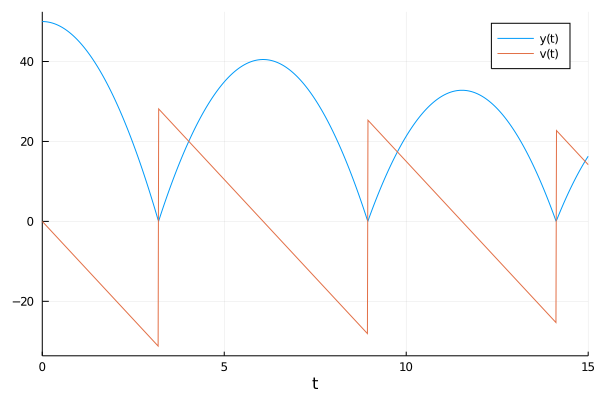

In [1]:
sol = solve(prob,Tsit5())
using Plots; gr()
plot(sol)

and tada, the ball bounces! Notice that the `ContinuousCallback` is using the interpolation to apply the effect "exactly" when `v == 0`. This is crucial for model correctness, and thus when this property is needed a `ContinuousCallback` should be used.

## Discrete Callbacks

A discrete callback checks a `condition` after every integration step and, if true, it will apply an `affect!`. For example, let's say that at time `t=2` we want to include that a kid kicked the ball, adding `20` to the current velocity. This kind of situation, where we want to add a specific behavior which does not require rootfinding, is a good candidate for a `DiscreteCallback`. In this case, the `condition` is a boolean for whether to apply the `affect!`, so:

In [1]:
function condition_kick(u,t,integrator)
    t == 2
end

condition_kick

We want the kick to occur at `t=2`, so we check for that time point. When we are at this time point, we want to do

In [1]:
function affect_kick!(integrator)
    integrator.u[2] += 50
end

affect_kick!

Now we build the problem as before

In [1]:
kick_cb = DiscreteCallback(condition_kick,affect_kick!)
u0 = [50.0,0.0]
tspan = (0.0,10.0)
p = (9.8,0.9)
prob = ODEProblem(ball!,u0,tspan,p,callback=kick_cb)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: [50.0, 0.0]

Note that, since we are requiring our effect at exactly the time `t=2`, we need to tell the integration scheme to step at exactly `t=2` to apply this callback. This is done via the option `tstops`, which is like `saveat` but means "stop at these values".

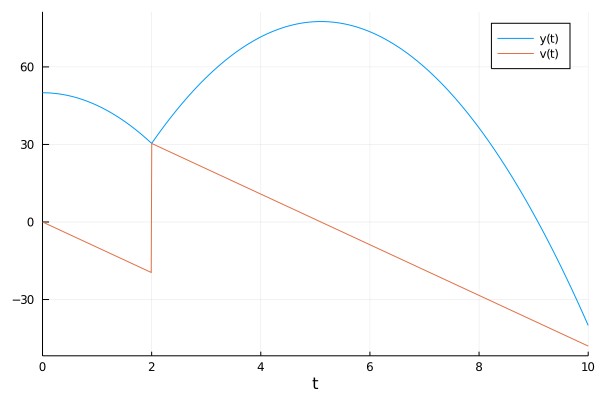

In [1]:
sol = solve(prob,Tsit5(),tstops=[2.0])
plot(sol)

Note that this example could've been done with a `ContinuousCallback` by checking the condition `t-2`.

## Merging Callbacks with Callback Sets

In some cases you may want to merge callbacks to build up more complex behavior. In our previous result, notice that the model is unphysical because the ball goes below zero! What we really need to do is add the bounce callback together with the kick. This can be achieved through the `CallbackSet`

In [1]:
cb = CallbackSet(bounce_cb,kick_cb)

CallbackSet{Tuple{ContinuousCallback{typeof(condition),typeof(affect!),typeof(affect!),typeof(INITIALIZE_DEFAULT),Float64,Int64,Nothing,Int64}},Tuple{DiscreteCallback{typeof(condition_kick),typeof(affect_kick!),typeof(INITIALIZE_DEFAULT)}}}((ContinuousCallback{typeof(condition),typeof(affect!),typeof(affect!),typeof(INITIALIZE_DEFAULT),Float64,Int64,Nothing,Int64}(condition, affect!, affect!, INITIALIZE_DEFAULT, nothing, true, 10, Bool[1, 1], 1, 2.22045e-15, 0),), (DiscreteCallback{typeof(condition_kick),typeof(affect_kick!),typeof(INITIALIZE_DEFAULT)}(condition_kick, affect_kick!, INITIALIZE_DEFAULT, Bool[1, 1]),))

A `CallbackSet` merges their behavior together. The logic is as follows. In a given interval, if there are multiple continuous callbacks that would trigger, only the one that triggers at the earliest time is used. The time is pulled back to where that continuous callback is triggered, and then the `DiscreteCallback`s in the callback set are called in order.

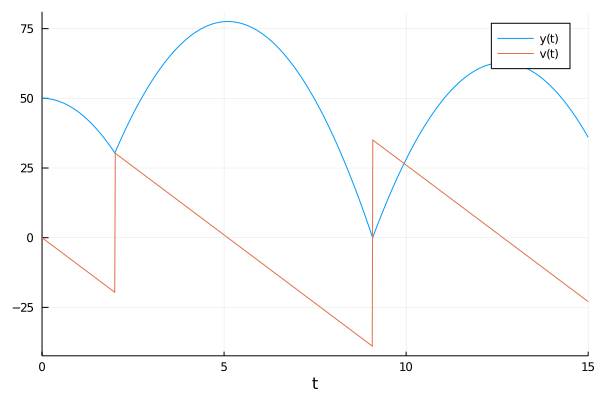

In [1]:
u0 = [50.0,0.0]
tspan = (0.0,15.0)
p = (9.8,0.9)
prob = ODEProblem(ball!,u0,tspan,p,callback=cb)
sol = solve(prob,Tsit5(),tstops=[2.0])
plot(sol)

Notice that we have now merged the behaviors. We can then nest this as deep as we like.

## Integration Termination and Directional Handling

Let's look at another model now: the model of the [Harmonic Oscillator](https://en.wikipedia.org/wiki/Harmonic_oscillator). We can write this using **[ParameterizedFunctions.jl](https://github.com/JuliaDiffEq/ParameterizedFunctions.jl).**

In [1]:
using Pkg
pkg"add ParameterizedFunctions"

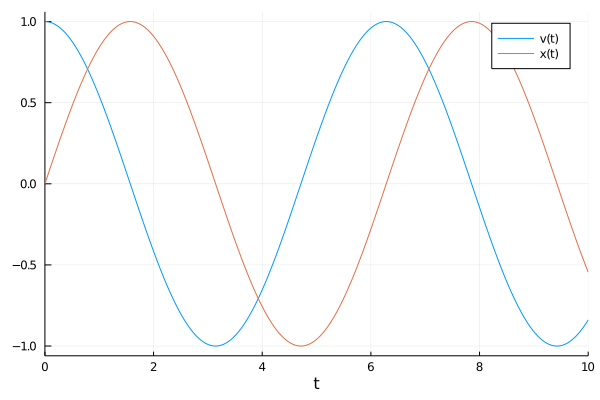

In [1]:
using DifferentialEquations, ParameterizedFunctions

harmonic! = @ode_def HarmonicOscillator begin
   dv = -x
   dx = v
end

u0 = [1.,0.]
tspan = (0.0,10.0)
prob = ODEProblem(harmonic!,u0,tspan)
sol = solve(prob)
plot(sol)

Let's instead stop the integration when a condition is met. From the [Integrator Interface stepping controls](http://docs.juliadiffeq.org/latest/basics/integrator.html#Stepping-Controls-1) we see that `terminate!(integrator)` will cause the integration to end. So our new `affect!` is simply:

In [1]:
function terminate_affect!(integrator)
    terminate!(integrator)
end

terminate_affect!

Let's first stop the integration when the particle moves back to `x=0`. This means we want to use the condition

In [1]:
function terminate_condition(u,t,integrator)
    u[2]
end
terminate_cb = ContinuousCallback(terminate_condition,terminate_affect!)

ContinuousCallback{typeof(terminate_condition),typeof(terminate_affect!),typeof(terminate_affect!),typeof(INITIALIZE_DEFAULT),Float64,Int64,Nothing,Int64}(terminate_condition, terminate_affect!, terminate_affect!, INITIALIZE_DEFAULT, nothing, true, 10, Bool[1, 1], 1, 2.22045e-15, 0)

Note that instead of adding callbacks to the problem, we can also add them to the `solve` command. This will automatically form a `CallbackSet` with any problem-related callbacks and naturally allows you to distinguish between model features and integration controls

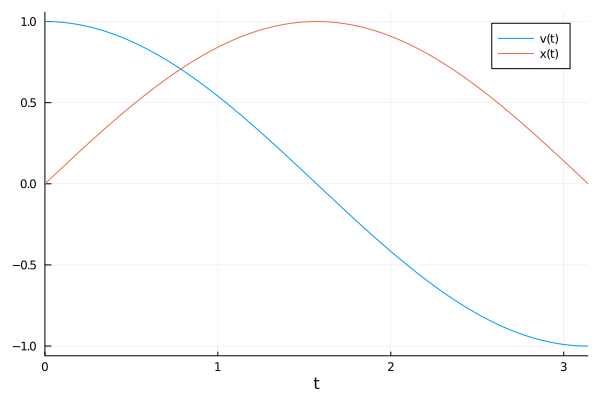

In [1]:
sol = solve(prob,callback=terminate_cb)
plot(sol)

Notice that the harmonic oscilator's true solution here is `sin` and `cosine`, and thus we would expect this return to zero to happen at `t=π`

In [1]:
sol.t[end]

3.14159

This is one way to approximate π! Lower tolerances and arbitrary precision numbers can make this more exact, but let's not look at that. Instead, what if we wanted to halt the integration after exactly one cycle? To do so we would need to ignore the first zero-crossing. Luckily in these types of scenarios there's usually a structure to the problem that can be exploited. Here, we only want to trigger the `affect!` when crossing from positive to negative, and not when crossing from negative to positive. In other words, we want our `affect!` to only occur on upcrossings.

If the `ContinuousCallback` constructor is given a single `affect!`, it will occur on both upcrossings and downcrossings. If there are two `affect!`s given, then the first is for upcrossings and the second is for downcrossings. An `affect!` can be ignored by using `nothing`. Together, the "upcrossing-only" version of the effect means that the first `affect!` is what we defined above and the second is `nothing`. Therefore we want:

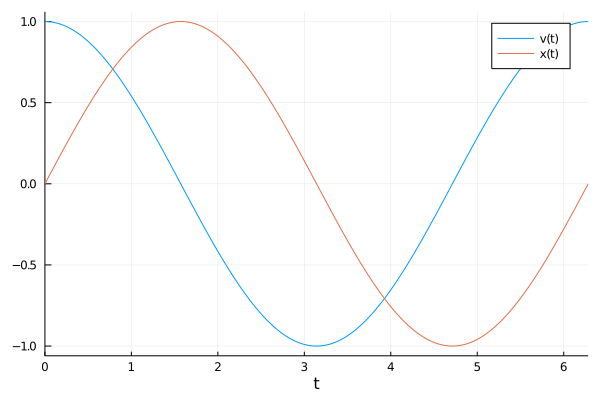

In [1]:
terminate_upcrossing_cb = ContinuousCallback(terminate_condition,terminate_affect!,nothing)
sol = solve(prob,callback=terminate_upcrossing_cb)
plot(sol)

## Callback Library

As you can see, callbacks can be very useful and through `CallbackSets` we can merge together various behaviors. Because of this utility, there is a library of pre-built callbacks known as the [Callback Library](http://docs.juliadiffeq.org/latest/features/callback_library.html). We will walk through a few examples where these callbacks can come in handy.

### Manifold Projection

One callback is the manifold projection callback. Essentially, you can define any manifold `g(sol)=0` which the solution must live on, and cause the integration to project to that manifold after every step. As an example, let's see what happens if we naively run the harmonic oscillator for a long time:

In [1]:
tspan = (0.0,10000.0)
prob = ODEProblem(harmonic!,u0,tspan)
sol = solve(prob)
pyplot(fmt=:png) # Make it a PNG instead of an SVG since there's a lot of points!
plot(sol,vars=(1,2))

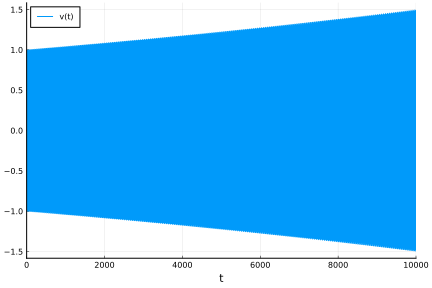

In [1]:
plot(sol,vars=(0,1),denseplot=false)

Notice that what's going on is that the numerical solution is drifting from the true solution over this long time scale. This is because the integrator is not conserving energy.

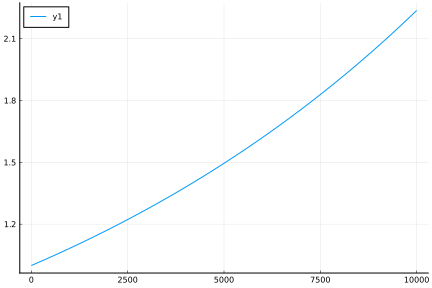

In [1]:
plot(sol.t,[u[2]^2 + u[1]^2 for u in sol.u],legend=:topleft) # Energy ~ x^2 + v^2

Some integration techniques like [symplectic integrators](http://docs.juliadiffeq.org/latest/solvers/dynamical_solve.html#Symplectic-Integrators-1) are designed to mitigate this issue, but instead let's tackle the problem by enforcing conservation of energy. To do so, we define our manifold as the one where energy equals 1 (since that holds in the initial condition), that is:

In [1]:
function g2(resid,u,p,t)
  resid[1] = u[2]^2 + u[1]^2 - 1
  resid[2] = 0
end

g2

Here the residual measures how far from our desired energy we are, and the number of conditions matches the size of our system (we ignored the second one by making the residual 0). Thus we define a `ManifoldProjection` callback and add that to the solver:

In [1]:
cb = ManifoldProjection(g2)
sol = solve(prob,callback=cb)
plot(sol,vars=(1,2))

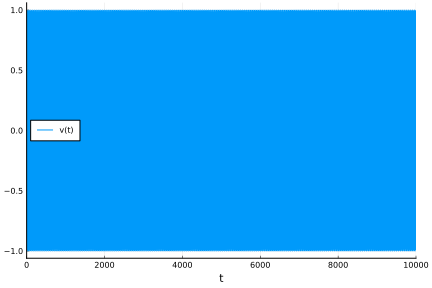

In [1]:
plot(sol,vars=(0,1),denseplot=false)

Now we have "perfect" energy conservation, where if it's ever violated too much the solution will get projected back to `energy=1`

In [1]:
u1,u2 = sol[500]
u2^2 + u1^2

1.00004

While choosing different integration schemes and using lower tolerances can achieve this effect as well, this can be a nice way to enforce physical constraints and is thus used in many disciplines like molecular dynamics. Another such domain constraining callback is the [`PositiveCallback()`](http://docs.juliadiffeq.org/latest/features/callback_library.html#PositiveDomain-1) which can be used to enforce positivity of the variables.

### SavingCallback

The `SavingCallback` can be used to allow for special saving behavior. Let's take a linear ODE define on a system of 1000x1000 matrices

In [1]:
prob = ODEProblem((du,u,p,t)->du.=u,rand(1000,1000),(0.0,1.0))

ODEProblem with uType Array{Float64,2} and tType Float64. In-place: true
timespan: (0.0, 1.0)
u0: [0.1154 0.86418 … 0.0732804 0.247216; 0.400947 0.300336 … 0.201488 0.424674; … ; 0.193335 0.577597 … 0.60403 0.230965; 0.18929 0.0212218 … 0.339126 0.341953]

In fields like quantum mechanics you may only want to know specific properties of the solution such as the trace or the norm of the matrix. Saving all of the 1000x1000 matrices can be a costly way to get this information! Instead, we can use the `SavingCallback` to save the `trace` and `norm` at specified times. To do so, we first define our `SavedValues` cache. Our time is in terms of `Float64`, and we want to save tuples of `Float64`s (one for the `trace` and one for the `norm`), and thus we generate the cache as:

In [1]:
saved_values = SavedValues(Float64, Tuple{Float64,Float64})

SavedValues{tType=Float64, savevalType=Tuple{Float64,Float64}}
t:
Float64[]
saveval:
Tuple{Float64,Float64}[]

Now we define the `SavingCallback` by giving it a function of `(u,p,t,integrator)` that returns the values to save, and the cache

In [1]:
using LinearAlgebra
cb = SavingCallback((u,t,integrator)->(tr(u),norm(u)), saved_values)

DiscreteCallback{var"#30#31",SavingAffect{var"#49#50",Float64,Tuple{Float64,Float64},BinaryHeap{Float64,LessThan},Array{Float64,1}},typeof(saving_initialize)}(#30, SavingAffect{var"#49#50",Float64,Tuple{Float64,Float64},BinaryHeap{Float64,LessThan},Array{Float64,1}}(#49, SavedValues{tType=Float64, savevalType=Tuple{Float64,Float64}}
t:
Float64[]
saveval:
Tuple{Float64,Float64}[], BinaryHeap{Float64,LessThan}(LessThan(), Float64[]), Float64[], true, true, true, 0), saving_initialize, Bool[0, 0])

Here we take `u` and save `(tr(u),norm(u))`. When we solve with this callback

In [1]:
# Turn off normal saving
sol = solve(prob, Tsit5(), callback=cb, save_everystep=false, save_start=false, save_end = false) 

retcode: Success
Interpolation: 1st order linear
t: Float64[]
u: Array{Float64,2}[]

Our values are stored in our `saved_values` variable

In [1]:
saved_values.t

5-element Array{Float64,1}:
 0.0
 0.100129
 0.348391
 0.683738
 1.0

In [1]:
saved_values.saveval

5-element Array{Tuple{Float64,Float64},1}:
 (508.416, 577.294)
 (561.959, 638.091)
 (720.317, 817.901)
 (1007.31, 1143.77)
 (1382.02, 1569.25)

By default this happened only at the solver's steps. But the `SavingCallback` has similar controls as the integrator. For example, if we want to save at every `0.1` seconds, we do can so using `saveat`

In [1]:
saved_values = SavedValues(Float64, Tuple{Float64,Float64}) # New cache
cb = SavingCallback((u,t,integrator)->(tr(u),norm(u)), saved_values, saveat = 0.0:0.1:1.0)
# Turn off normal saving
sol = solve(prob, Tsit5(), callback=cb, save_everystep=false, save_start=false, save_end = false) 

retcode: Success
Interpolation: 1st order linear
t: Float64[]
u: Array{Float64,2}[]

In [1]:
saved_values.t

11-element Array{Float64,1}:
 0.0
 0.1
 0.2
 0.3
 0.4
 0.5
 0.6
 0.7
 0.8
 0.9
 1.0

In [1]:
saved_values.saveval

11-element Array{Tuple{Float64,Float64},1}:
 (508.416, 577.294)
 (561.887, 638.008)
 (620.981, 705.108)
 (686.29, 779.265)
 (758.468, 861.221)
 (838.236, 951.796)
 (926.394, 1051.9)
 (1023.82, 1162.53)
 (1131.5, 1284.79)
 (1250.5, 1419.91)
 (1382.02, 1569.25)

# Formatting Plots

Since the plotting functionality is implemented as a recipe to Plots.jl, [all of the options open to Plots.jl can be used in our plots](https://juliaplots.github.io/supported/). In addition, there are special features specifically for [differential equation plots](http://docs.juliadiffeq.org/latest/basics/plot.html). This tutorial will teach some of the most commonly used options. Let's first get the solution to some ODE. Here I will use one of the Lorenz ordinary differential equation. As with all commands in DifferentialEquations.jl, I got a plot of the solution by calling `solve` on the problem, and `plot` on the solution

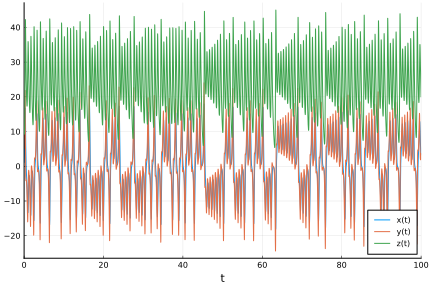

In [1]:
using DifferentialEquations, Plots, ParameterizedFunctions
lorenz3 = @ode_def begin
  dx = σ*(y-x)
  dy = ρ*x-y-x*z
  dz = x*y-β*z
end σ β ρ

p = [10.0,8/3,28]
u0 = [1., 5., 10.]
tspan = (0., 100.)
prob = ODEProblem(lorenz3, u0, tspan, p)
sol = solve(prob)
plot(sol)

Now let's change it to a phase plot. As discussed in the [plot functions page](http://docs.juliadiffeq.org/latest/basics/plot.html), we can use the `vars` command to choose the variables to plot. Let's plot variable `x` vs variable `y` vs variable `z`

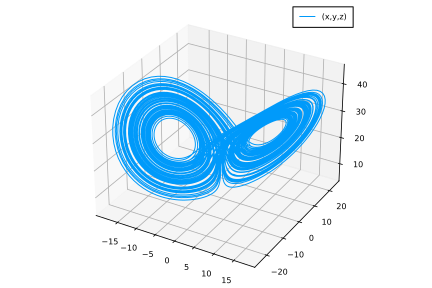

In [1]:
plot(sol,vars=(1, 2, 3))

In [1]:
# Not available in MOdelingToolkit.jl yet
# plot(sol,vars=[:x])

Notice that we were able to use the variable names because we had defined the problem with the macro. But in general, we can use the indices. The previous plots would be

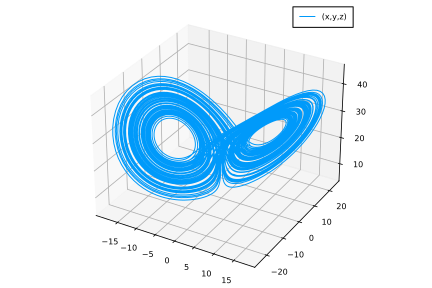

In [1]:
plot(sol,vars=(1,2,3))

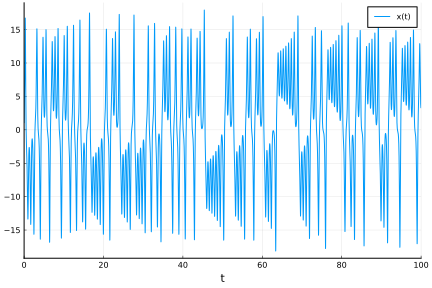

In [1]:
plot(sol,vars=[1])

Common options are to add titles, axis, and labels. For example

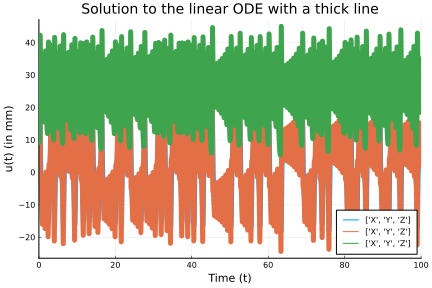

In [1]:
plot(sol,linewidth=5,
     title="Solution to the linear ODE with a thick line",
     xaxis="Time (t)",yaxis="u(t) (in mm)",label=["X","Y","Z"])

Notice that series recipes apply to the solution type as well. For example, we can use a scatter plot on the timeseries

In [1]:
# scatter(sol,vars=[:x])

This shows that the recipe is using the interpolation to smooth the plot. It becomes abundantly clear when we turn it off using `denseplot=false`

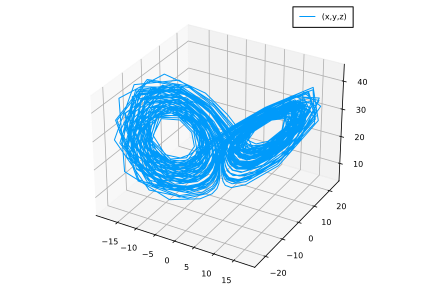

In [1]:
plot(sol,vars=(1,2,3),denseplot=false)

When this is done, only the values the timestep hits are plotted. Using the interpolation usually results in a much nicer looking plot so it's recommended, and since the interpolations have similar orders to the numerical methods, their results are trustworthy on the full interval. We can control the number of points used in the interpolation's plot using the `plotdensity` command

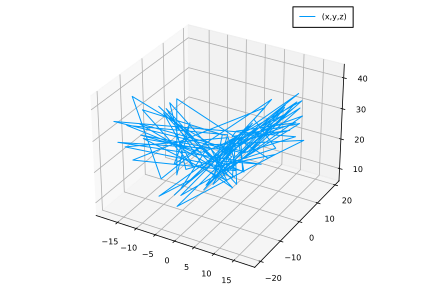

In [1]:
plot(sol,vars=(1,2,3),plotdensity=100)

That's plotting the entire solution using 100 points spaced evenly in time.

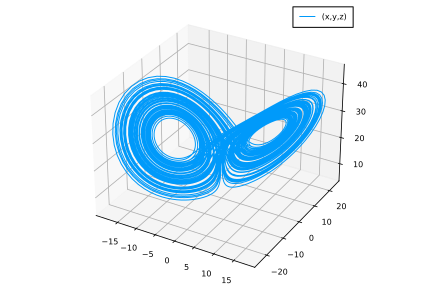

In [1]:
plot(sol,vars=(1,2,3),plotdensity=10000)

That's more like it! By default it uses `100*length(sol)`, where the length is the number of internal steps it had to take. This heuristic usually does well, but unusually difficult equations it can be relaxed (since it will take small steps), and for equations with events / discontinuities raising the plot density can help resolve the discontinuity.

Lastly notice that we can compose plots. Let's show where the 100 points are using a scatter plot:

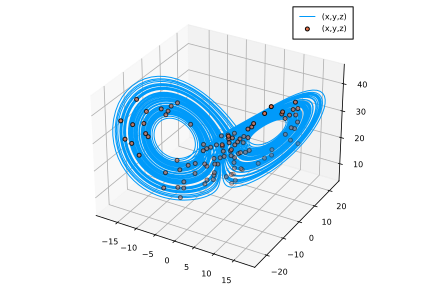

In [1]:
plot(sol,vars=(1,2,3))
scatter!(sol,vars=(1,2,3),plotdensity=100)

We can instead work with an explicit plot object. This form can be better for building a complex plot in a loop.

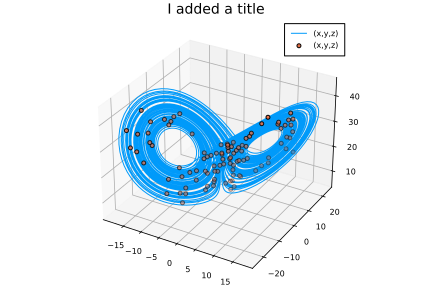

In [1]:
p = plot(sol,vars=(1,2,3))
scatter!(p,sol,vars=(1,2,3),plotdensity=100)
title!("I added a title")